In [25]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin

from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [5]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [19]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand16 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand17 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand18 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand19 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand20 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179985566-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand21 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00270411008-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand22 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand23 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')

Filename: /Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   
[1325.32427221 1325.34510534 1325.36593847 ... 1353.11563312 1353.1364661
 1353.15729907] [8317.34863281 8341.53515625 8339.61523438 ... 8351.75878906 8357.0546875
 8359.20703125]


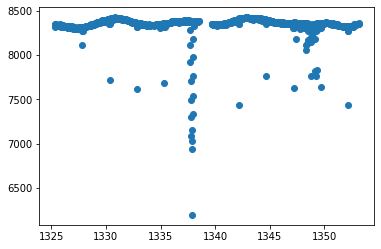

In [20]:
hdul1 = fits.open(cand1)
hdul1.info()
hdul1[0].header

dataset = hdul1[1].data
flux1 = dataset['FLUX_RAW']
time1 = dataset['TIME']
sect = hdul1[0].header['SECTOR']
camera = hdul1[0].header['CAMERA']
CCD = hdul1[0].header['CCD']
aperture = hdul1[3].data

plt.scatter(time1,flux1)
plt.show()

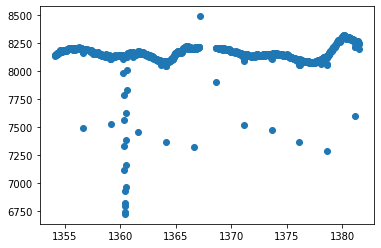

In [21]:
hdul2 = fits.open(cand2)
dataset = hdul2[1].data
time2 = dataset['TIME']
flux2 = dataset['FLUX_RAW']
sect = hdul2[0].header['SECTOR']
camera = hdul2[0].header['CAMERA']
CCD = hdul2[0].header['CCD']


plt.scatter(time2,flux2)
plt.show()

AttributeError: 'TessLightCurve' object has no attribute 'lc'

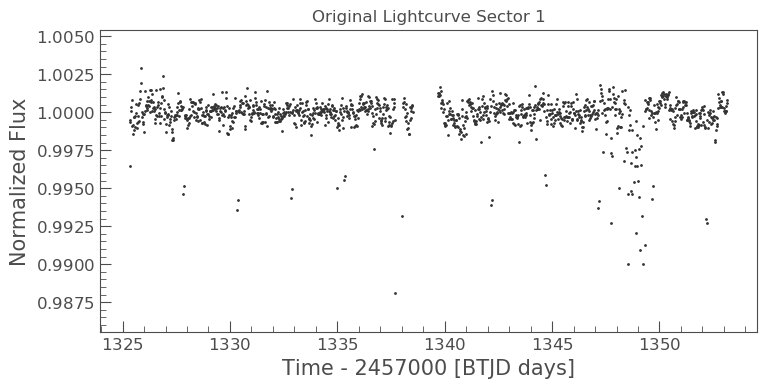

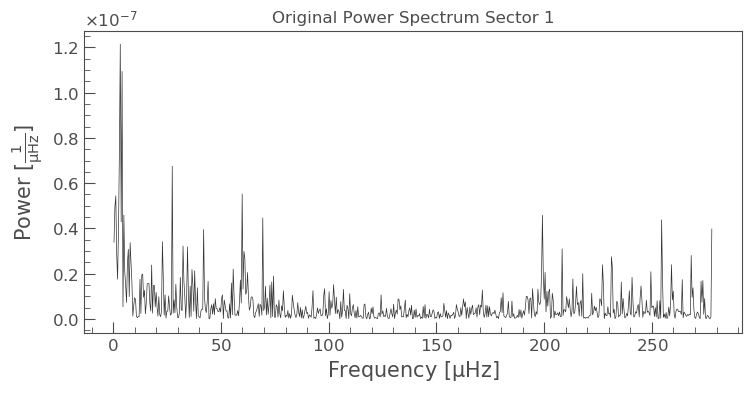

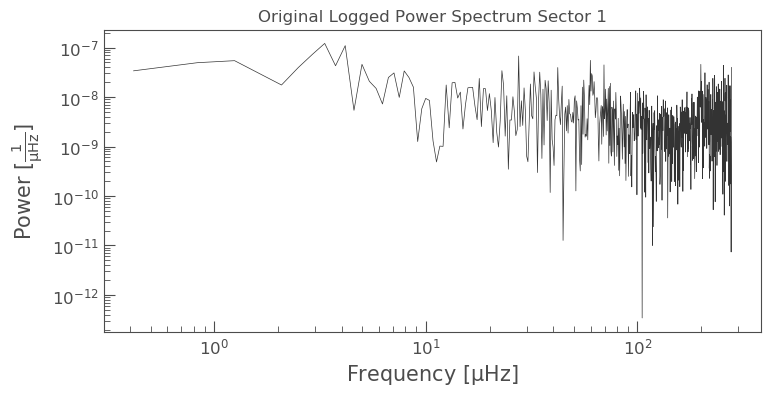

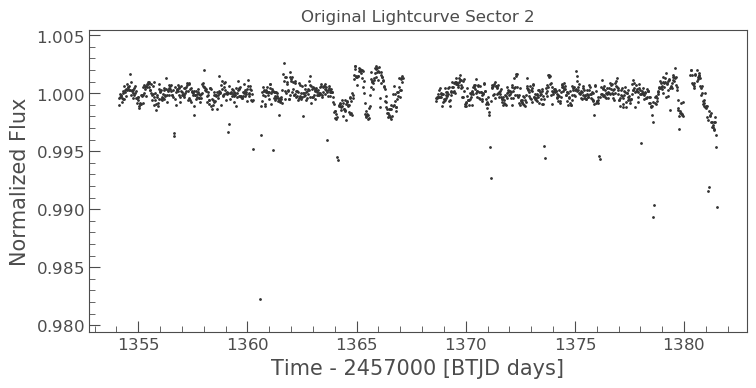

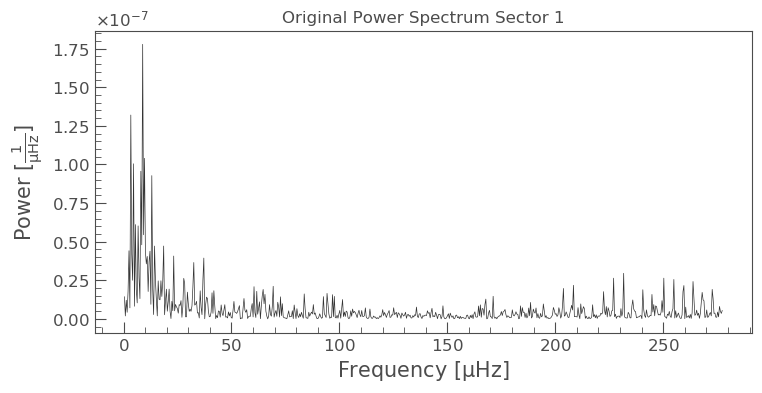

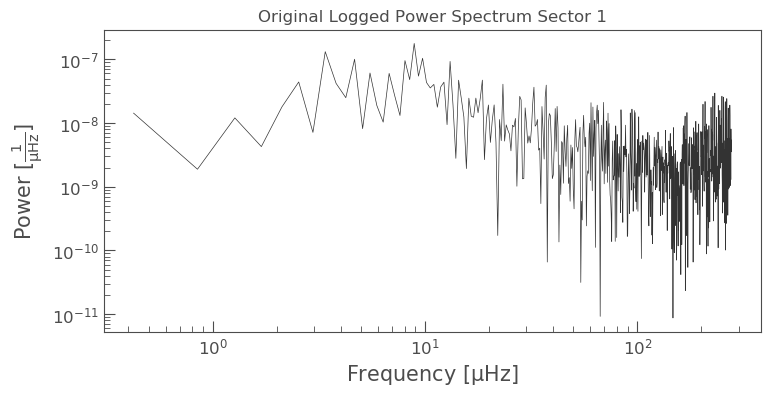

In [29]:
#Now for real stuff...

#Clip the large systematic
#condition = ((time1 > 1347) & (time1 < 1350))
#flux1[condition] = np.nan


model1 = lk.TessLightCurve(time1,flux1).remove_nans().normalize().remove_outliers(sigma_lower=3, sigma_upper=3).flatten(window_length=145)
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
model1.scatter()
plt.title('Original Lightcurve Sector 1')
power1.plot()
plt.title('Original Power Spectrum Sector 1')
power1.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model2 = lk.TessLightCurve(time2,flux2).remove_nans().normalize().remove_outliers(sigma_lower=3, sigma_upper=3).flatten(window_length=145)
power2 = model2.to_periodogram(method='lombscargle', normalization="psd")
model2.scatter()
plt.title('Original Lightcurve Sector 2')
power2.plot()
plt.title('Original Power Spectrum Sector 1')
power2.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')


corr_model1 = SFFCorrector.correct(model1, centroid_col=None, centroid_row=None)#model1.to_corrector("sff").correct()
corr_model1.scatter()
#dm = dm.append_constant()
#corrector = lk.RegressionCorrector(model1)
#model = corrector.model_lc
#model.plot()
#corr_model1 = corrector.correct(dm.values)
#corr_model1.scatter()

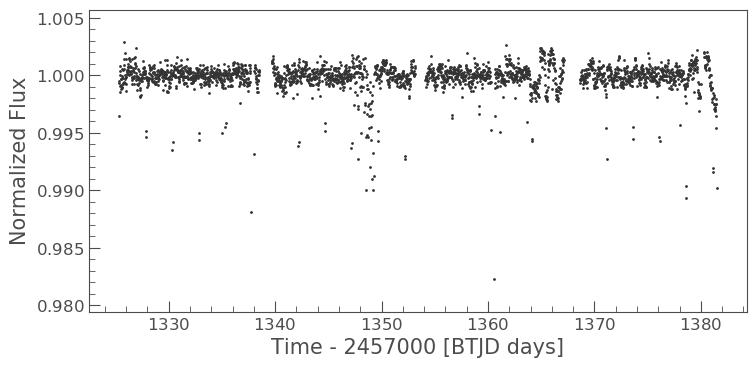

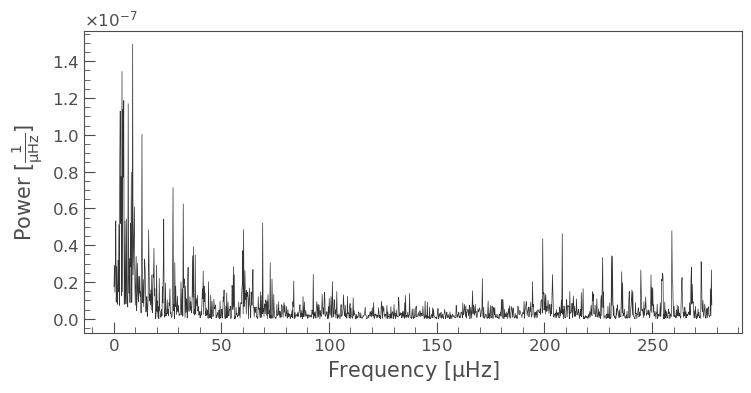

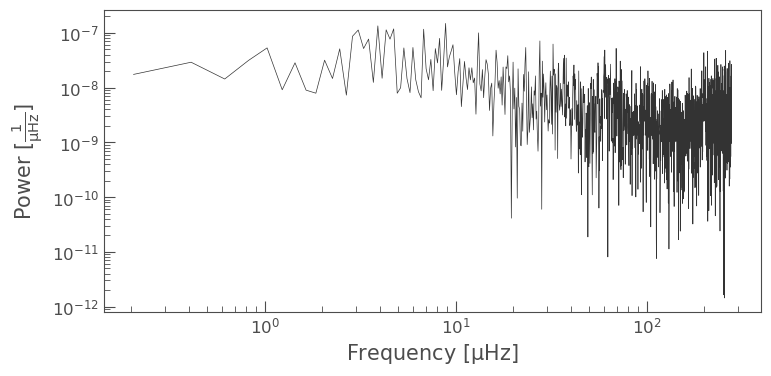

In [10]:
#Now to stitch the two sectors together and do same process..
combined_model1 = model1.append(model2)
combined_model1.scatter()
power_combined1 = combined_model1.to_periodogram(method='lombscargle', normalization="psd")
power_combined1.plot()
power_combined1.plot(scale='log')

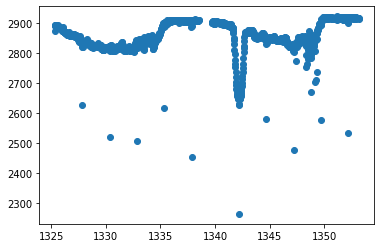

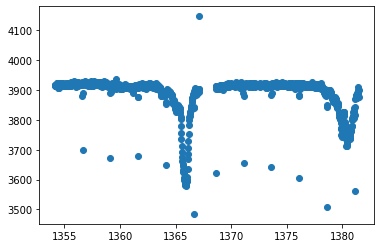

In [11]:
hdul3 = fits.open(cand3)
dataset = hdul3[1].data
time3 = dataset['TIME']
flux3 = dataset['FLUX_RAW']
sect = hdul3[0].header['SECTOR']
camera = hdul3[0].header['CAMERA']
CCD = hdul3[0].header['CCD']

plt.scatter(time3,flux3)
plt.show()


hdul4 = fits.open(cand4)
dataset = hdul4[1].data
time4 = dataset['TIME']
flux4 = dataset['FLUX_RAW']
sect = hdul4[0].header['SECTOR']
camera = hdul4[0].header['CAMERA']
CCD = hdul4[0].header['CCD']

plt.scatter(time4,flux4)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

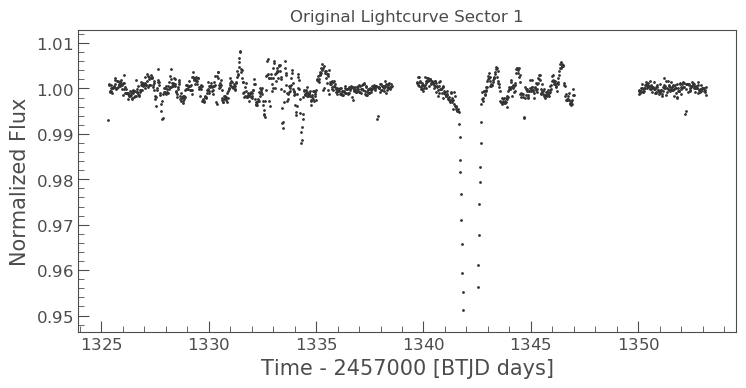

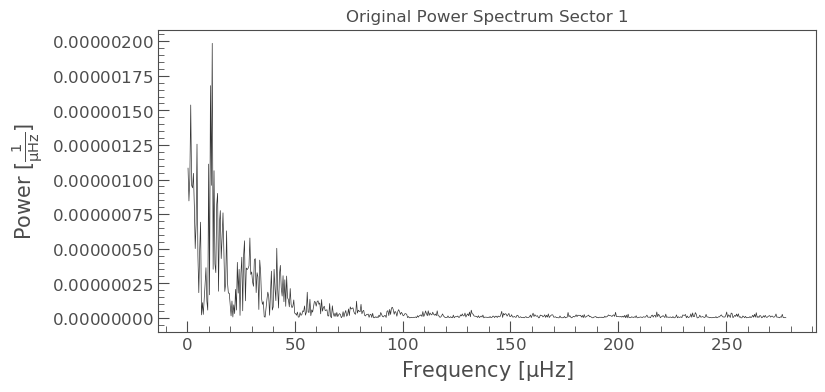

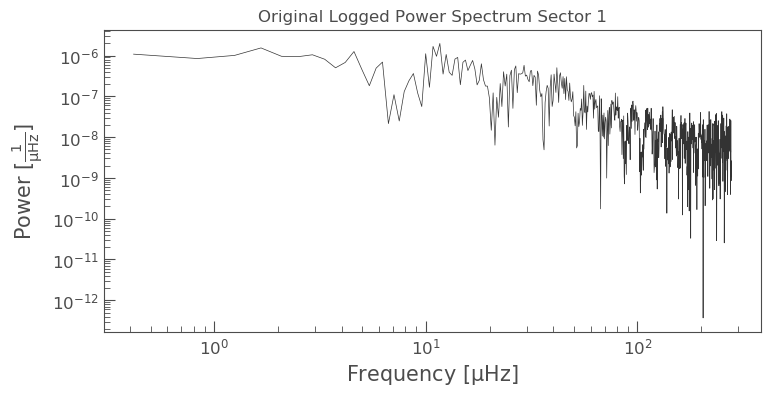

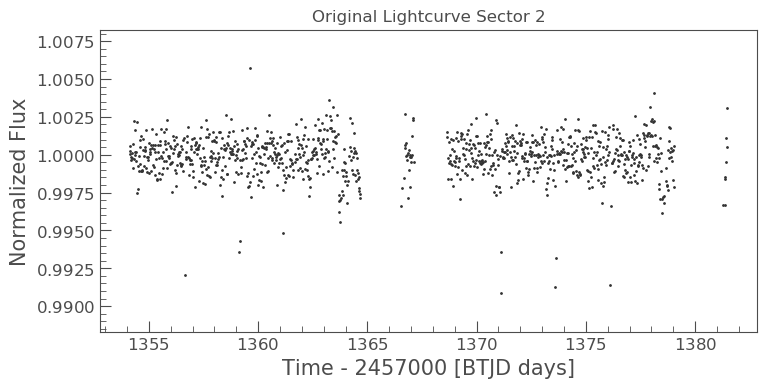

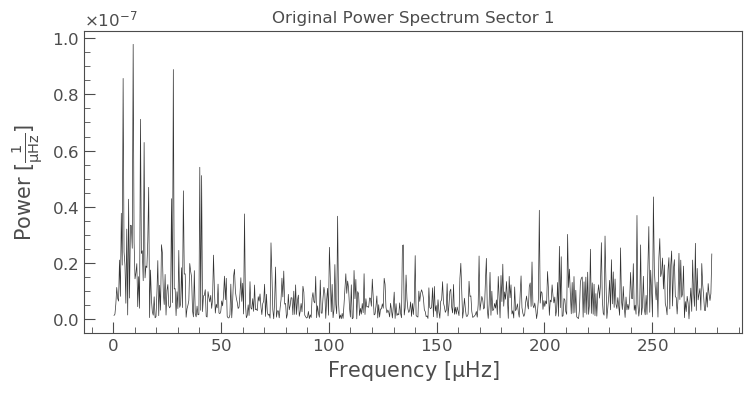

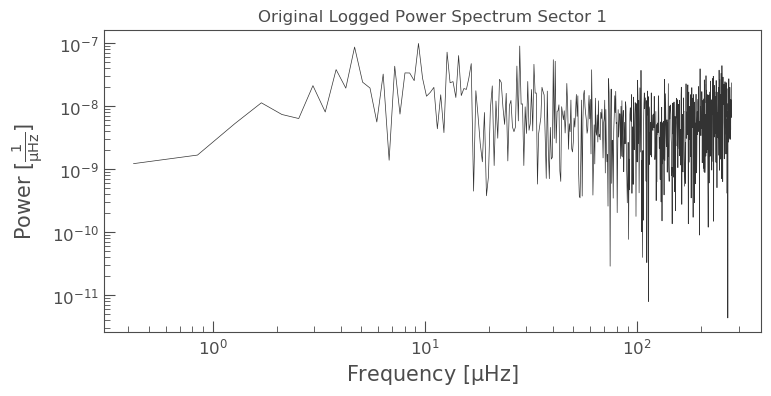

In [12]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux3[condition] = np.nan


model3 = lk.TessLightCurve(time3,flux3).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power3 = model3.to_periodogram(method='lombscargle', normalization="psd")
model3.scatter()
plt.title('Original Lightcurve Sector 1')
power3.plot()
plt.title('Original Power Spectrum Sector 1')
power3.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model4 = lk.TessLightCurve(time4,flux4).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power4 = model4.to_periodogram(method='lombscargle', normalization="psd")
model4.scatter()
plt.title('Original Lightcurve Sector 2')
power4.plot()
plt.title('Original Power Spectrum Sector 1')
power4.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

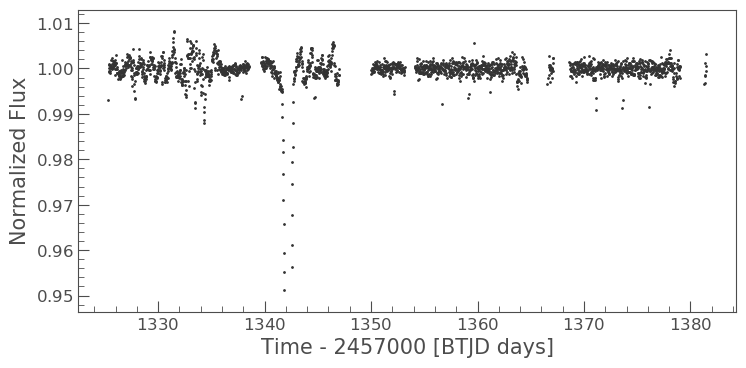

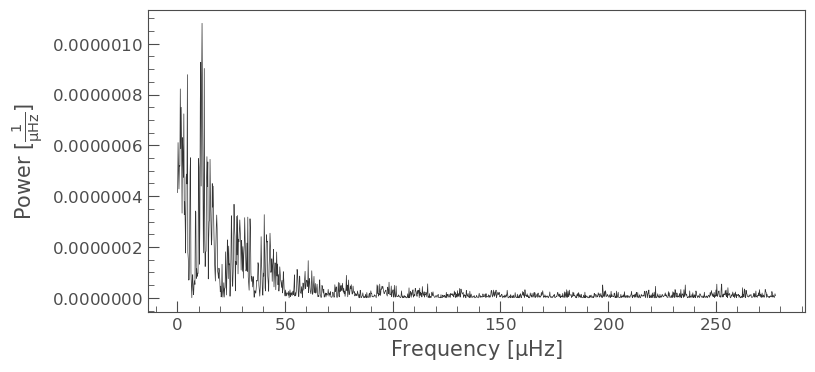

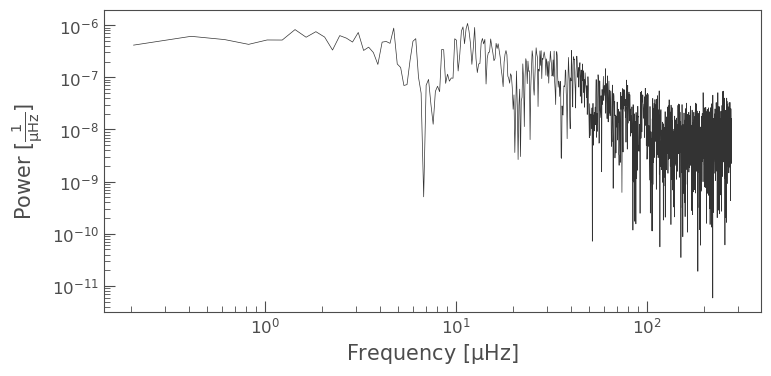

In [13]:
#Now to stitch the two sectors together and do same process..
combined_model2 = model3.append(model4)
combined_model2.scatter()
power_combined2 = combined_model2.to_periodogram(method='lombscargle', normalization="psd")
power_combined2.plot()
power_combined2.plot(scale='log')

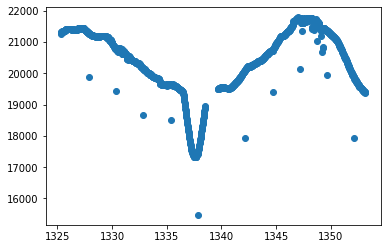

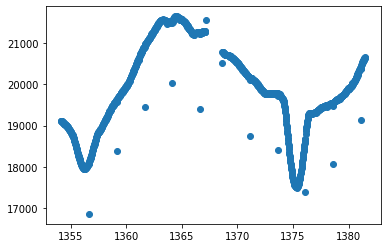

In [14]:
hdul5 = fits.open(cand5)
dataset5 = hdul5[1].data
time5 = dataset5['TIME']
flux5 = dataset5['FLUX_RAW']
sect = hdul5[0].header['SECTOR']
camera = hdul5[0].header['CAMERA']
CCD = hdul5[0].header['CCD']

plt.scatter(time5,flux5)
plt.show()

hdul6 = fits.open(cand6)
dataset6 = hdul6[1].data
time6 = dataset6['TIME']
flux6 = dataset6['FLUX_RAW']
sect = hdul6[0].header['SECTOR']
camera = hdul6[0].header['CAMERA']
CCD = hdul6[0].header['CCD']

plt.scatter(time6,flux6)
plt.show()


Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

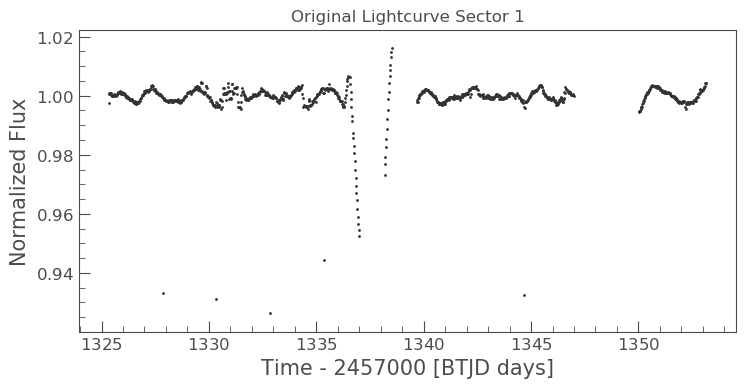

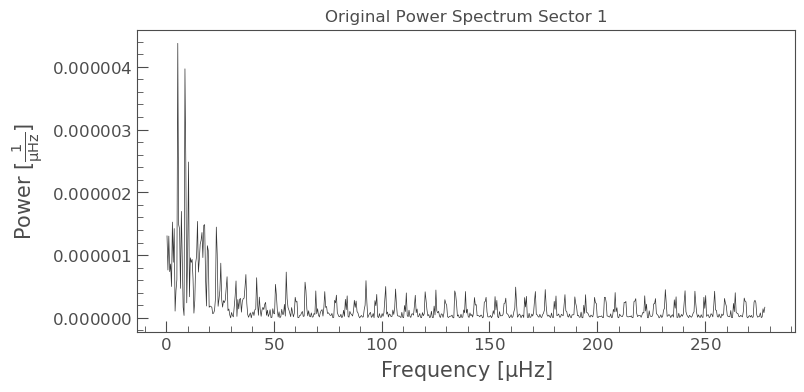

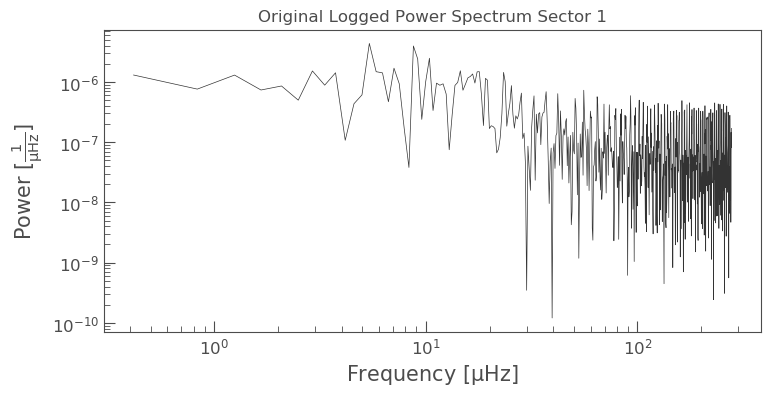

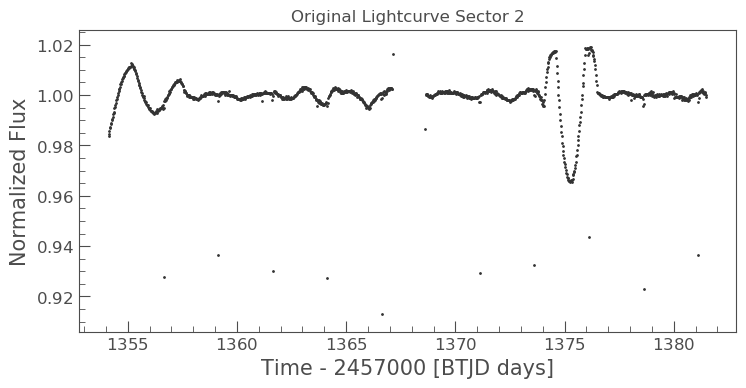

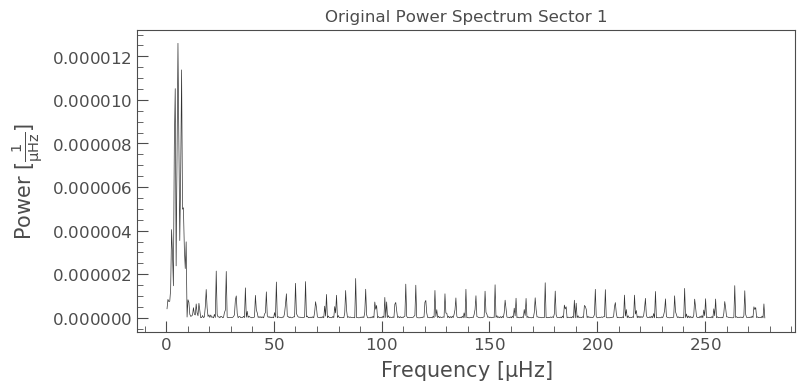

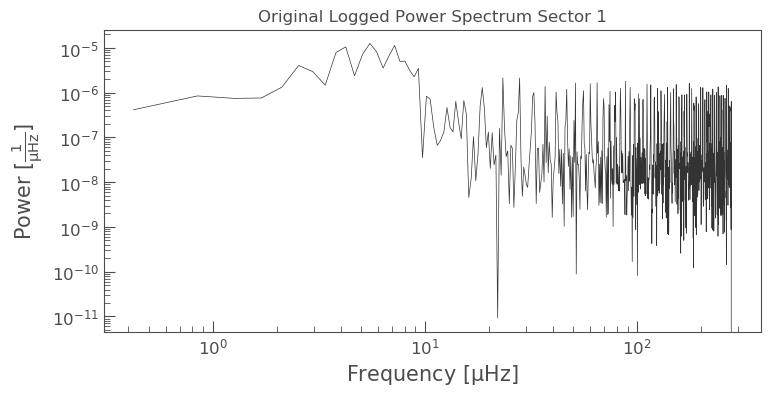

In [15]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux5[condition] = np.nan


model5 = lk.TessLightCurve(time5,flux5).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power5 = model5.to_periodogram(method='lombscargle', normalization="psd")
model5.scatter()
plt.title('Original Lightcurve Sector 1')
power5.plot()
plt.title('Original Power Spectrum Sector 1')
power5.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model6 = lk.TessLightCurve(time6,flux6).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power6 = model6.to_periodogram(method='lombscargle', normalization="psd")
model6.scatter()
plt.title('Original Lightcurve Sector 2')
power6.plot()
plt.title('Original Power Spectrum Sector 1')
power6.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

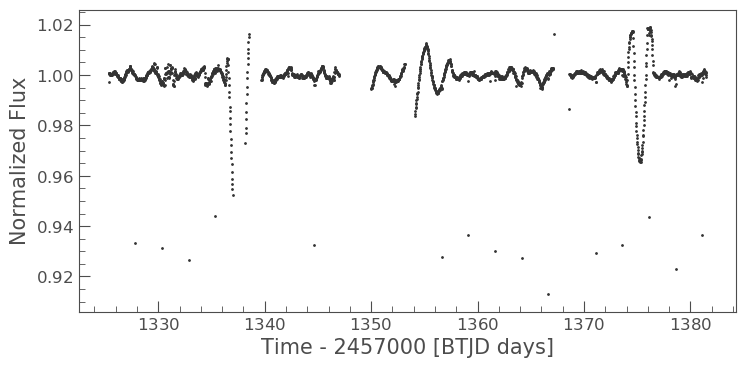

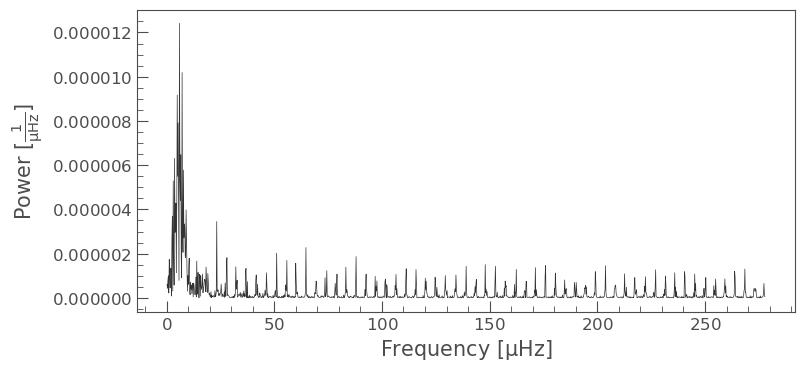

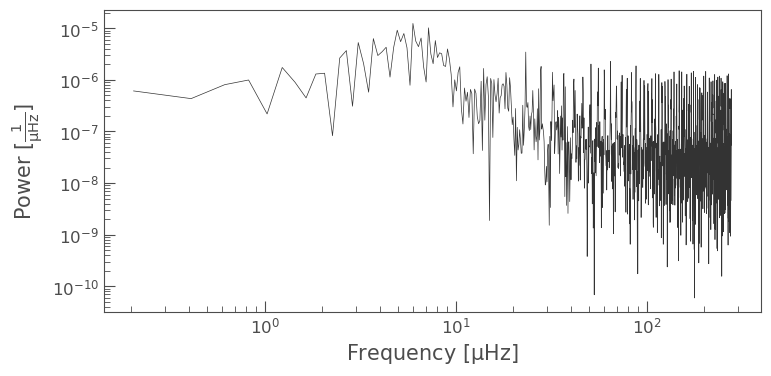

In [16]:
#Now to stitch the two sectors together and do same process..
combined_model3 = model5.append(model6)
combined_model3.scatter()
power_combined3 = combined_model3.to_periodogram(method='lombscargle', normalization="psd")
power_combined3.plot()
power_combined3.plot(scale='log')

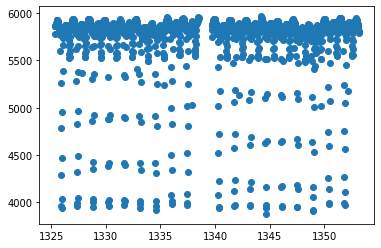

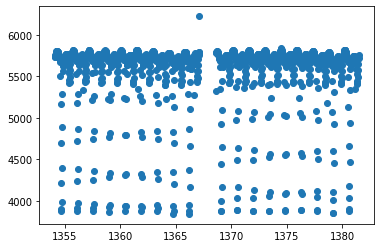

In [17]:
hdul7 = fits.open(cand7)
dataset7 = hdul7[1].data
time7 = dataset7['TIME']
flux7 = dataset7['FLUX_RAW']
sect = hdul7[0].header['SECTOR']
camera = hdul7[0].header['CAMERA']
CCD = hdul7[0].header['CCD']

plt.scatter(time7,flux7)
plt.show()

hdul8 = fits.open(cand8)
dataset8 = hdul8[1].data
time8 = dataset8['TIME']
flux8 = dataset8['FLUX_RAW']
sect = hdul8[0].header['SECTOR']
camera = hdul8[0].header['CAMERA']
CCD = hdul8[0].header['CCD']

plt.scatter(time8,flux8)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

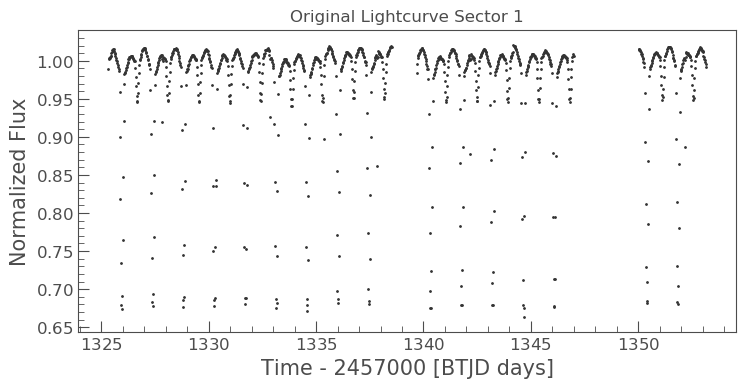

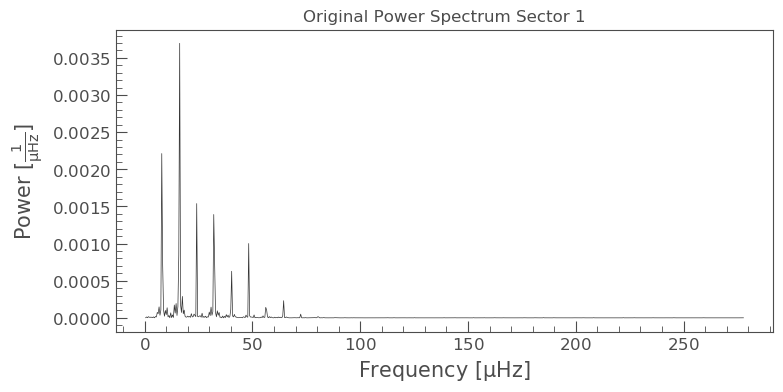

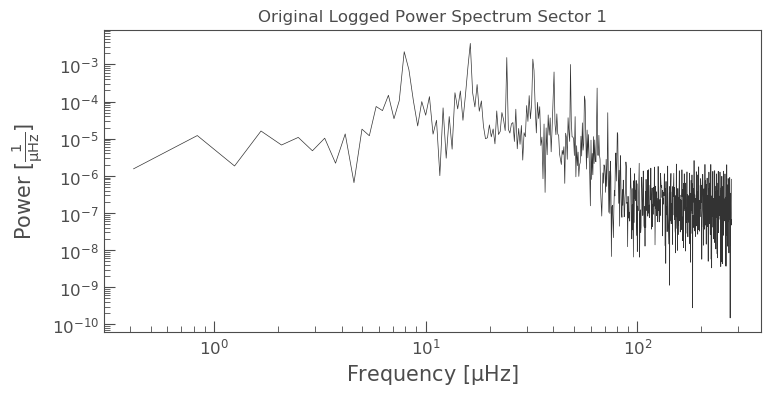

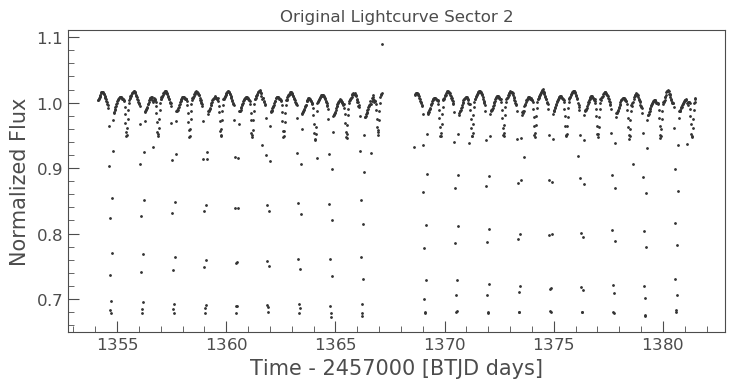

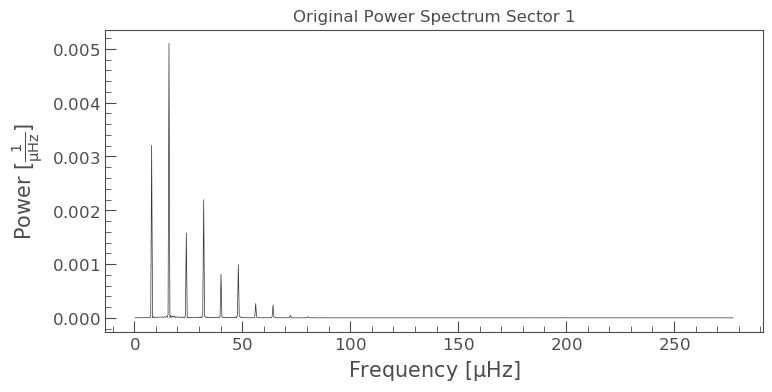

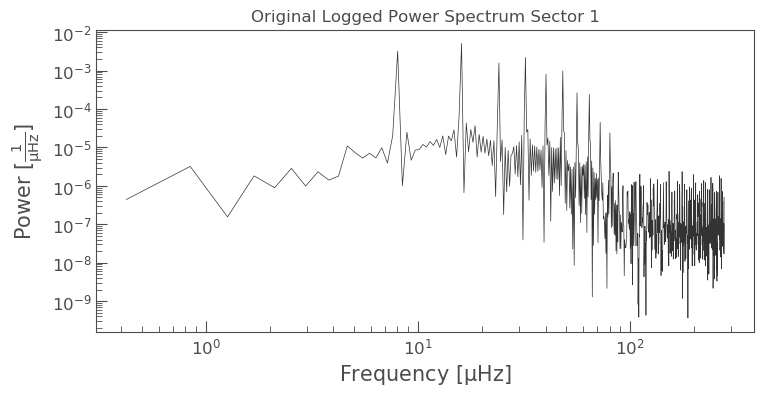

In [18]:
#Clip the large systematic
condition = ((time7 > 1347) & (time7 < 1350))
flux7[condition] = np.nan


model7 = lk.TessLightCurve(time7,flux7).remove_nans().normalize()#.remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power7 = model7.to_periodogram(method='lombscargle', normalization="psd")
model7.scatter()
plt.title('Original Lightcurve Sector 1')
power7.plot()
plt.title('Original Power Spectrum Sector 1')
power7.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model8 = lk.TessLightCurve(time8,flux8).remove_nans().normalize()#.remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power8 = model8.to_periodogram(method='lombscargle', normalization="psd")
model8.scatter()
plt.title('Original Lightcurve Sector 2')
power8.plot()
plt.title('Original Power Spectrum Sector 1')
power8.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

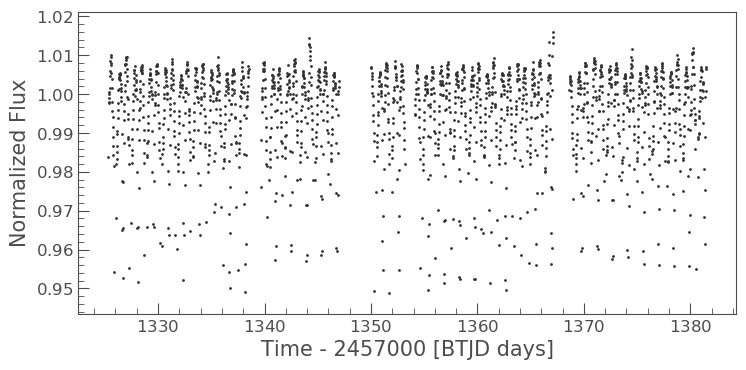

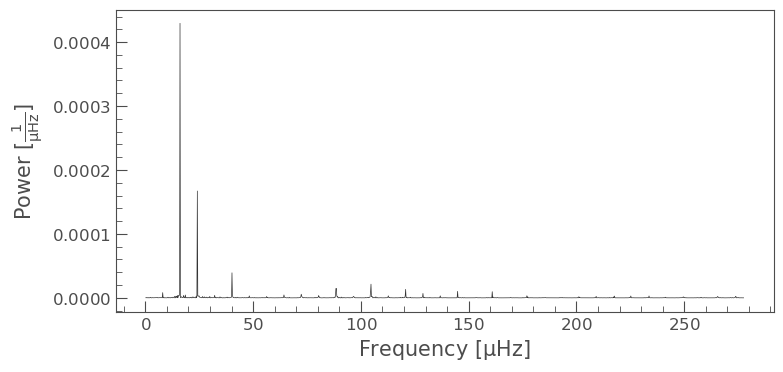

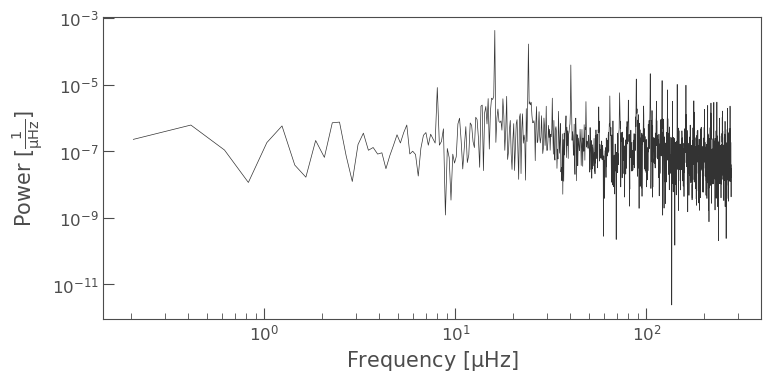

In [16]:
#Now to stitch the two sectors together and do same process..
combined_model4 = model7.append(model8)
combined_model4.scatter()
power_combined4 = combined_model4.to_periodogram(method='lombscargle', normalization="psd")
power_combined4.plot()
power_combined4.plot(scale='log')

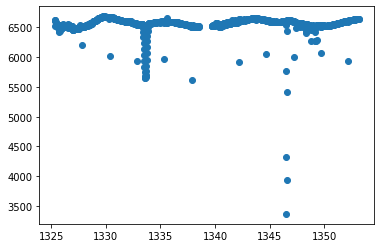

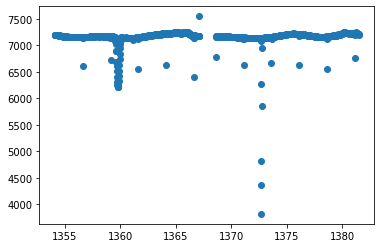

In [17]:
hdul9 = fits.open(cand9)
dataset9 = hdul9[1].data
time9 = dataset9['TIME']
flux9 = dataset9['FLUX_RAW']
sect = hdul9[0].header['SECTOR']
camera = hdul9[0].header['CAMERA']
CCD = hdul9[0].header['CCD']

plt.scatter(time9,flux9)
plt.show()

hdul10 = fits.open(cand10)
dataset10 = hdul10[1].data
time10 = dataset10['TIME']
flux10 = dataset10['FLUX_RAW']
sect = hdul10[0].header['SECTOR']
camera = hdul10[0].header['CAMERA']
CCD = hdul10[0].header['CCD']

plt.scatter(time10,flux10)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

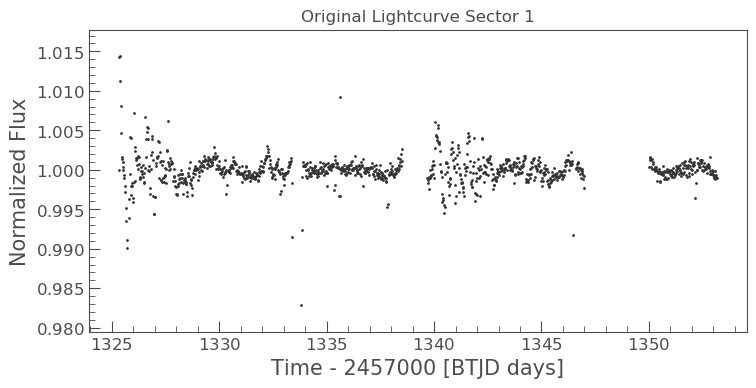

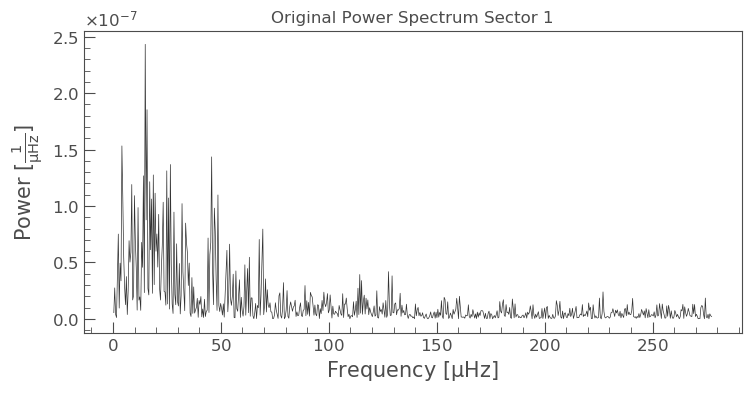

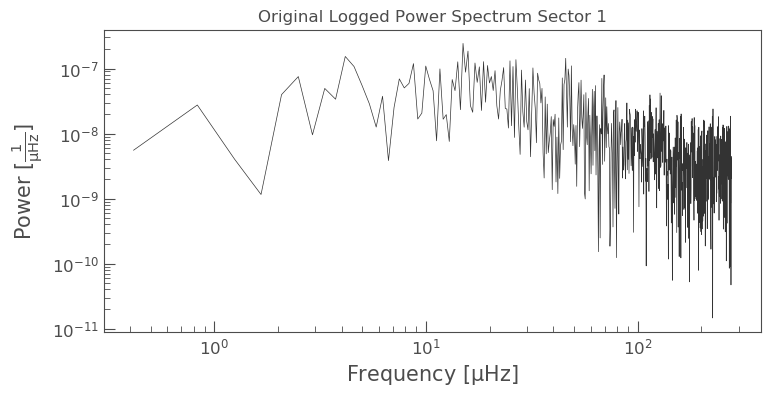

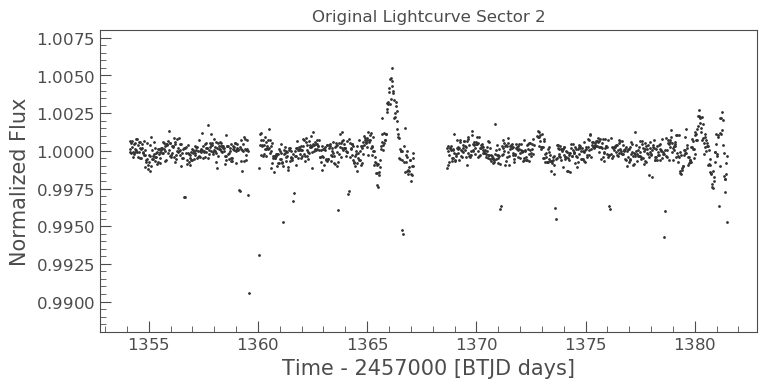

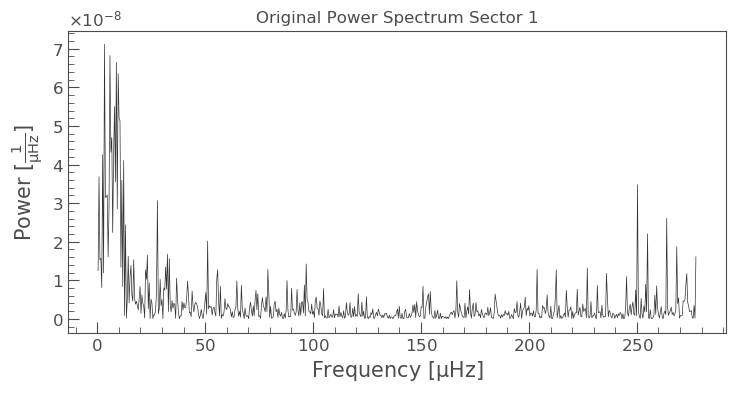

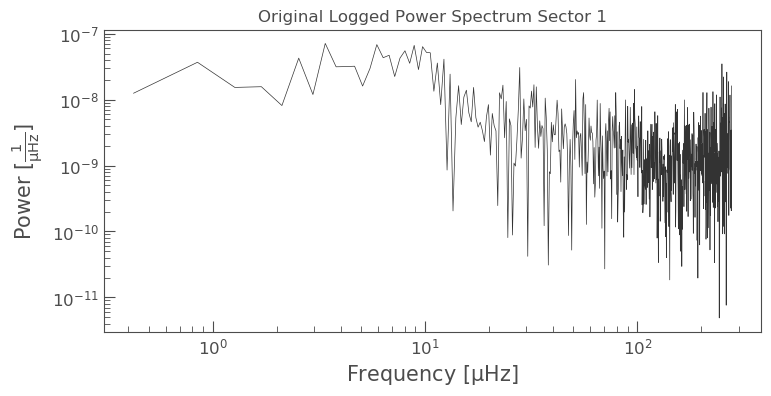

In [18]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux9[condition] = np.nan


model9 = lk.TessLightCurve(time9,flux9).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power9 = model9.to_periodogram(method='lombscargle', normalization="psd")
model9.scatter()
plt.title('Original Lightcurve Sector 1')
power9.plot()
plt.title('Original Power Spectrum Sector 1')
power9.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model10 = lk.TessLightCurve(time10,flux10).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power10 = model10.to_periodogram(method='lombscargle', normalization="psd")
model10.scatter()
plt.title('Original Lightcurve Sector 2')
power10.plot()
plt.title('Original Power Spectrum Sector 1')
power10.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

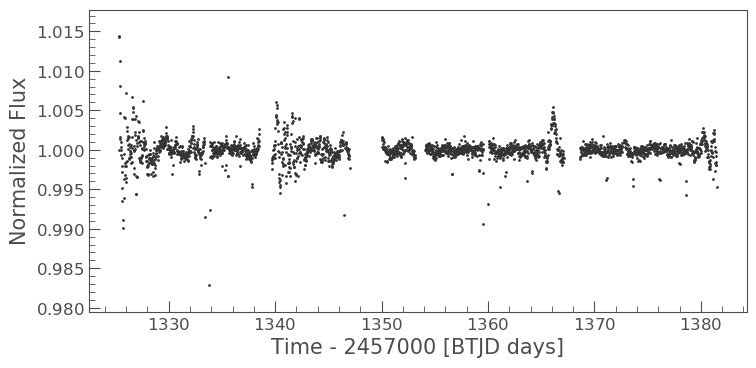

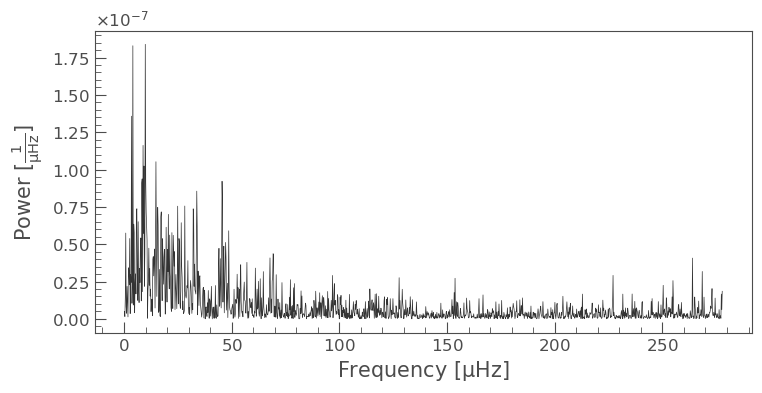

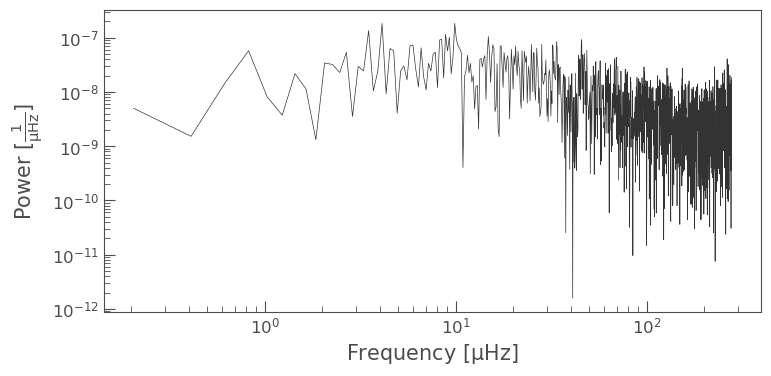

In [19]:
#Now to stitch the two sectors together and do same process..
combined_model5 = model9.append(model10)
combined_model5.scatter()
power_combined5 = combined_model5.to_periodogram(method='lombscargle', normalization="psd")
power_combined5.plot()
power_combined5.plot(scale='log')

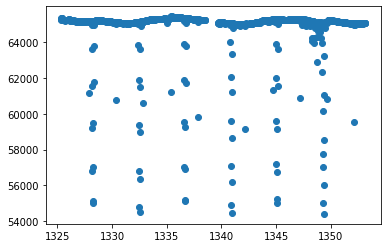

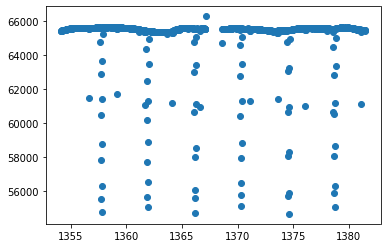

In [20]:
hdul11 = fits.open(cand11)
dataset11 = hdul11[1].data
time11 = dataset11['TIME']
flux11 = dataset11['FLUX_RAW']
sect = hdul11[0].header['SECTOR']
camera = hdul11[0].header['CAMERA']
CCD = hdul11[0].header['CCD']

plt.scatter(time11,flux11)
plt.show()

hdul12 = fits.open(cand12)
dataset12 = hdul12[1].data
time12 = dataset12['TIME']
flux12 = dataset12['FLUX_RAW']
sect = hdul12[0].header['SECTOR']
camera = hdul12[0].header['CAMERA']
CCD = hdul12[0].header['CCD']

plt.scatter(time12,flux12)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

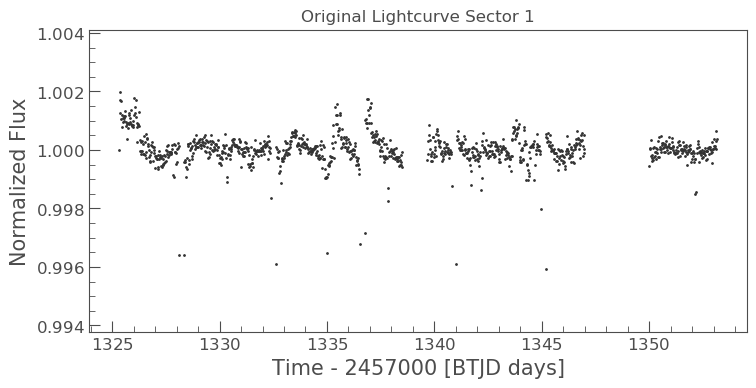

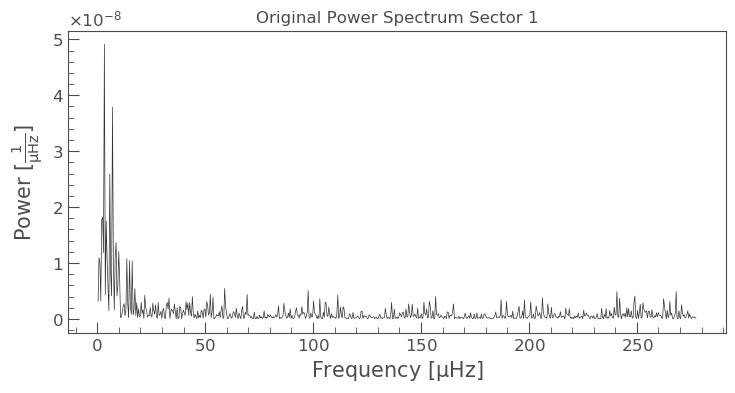

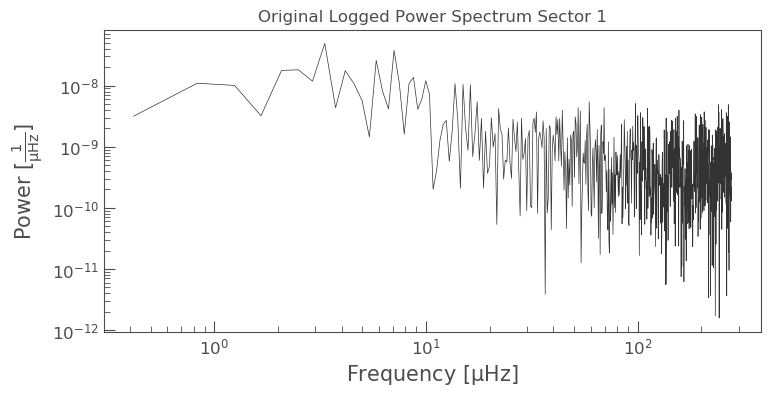

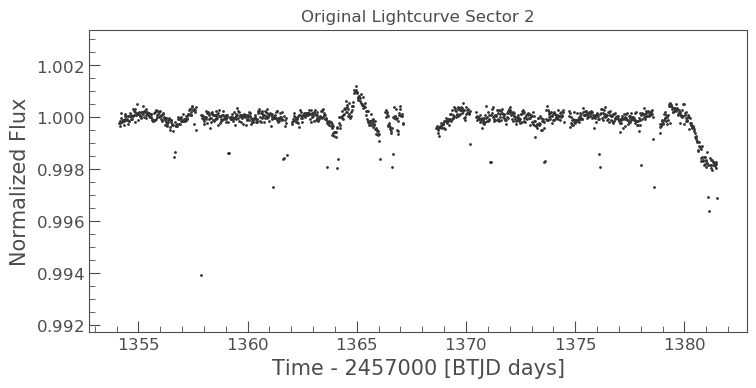

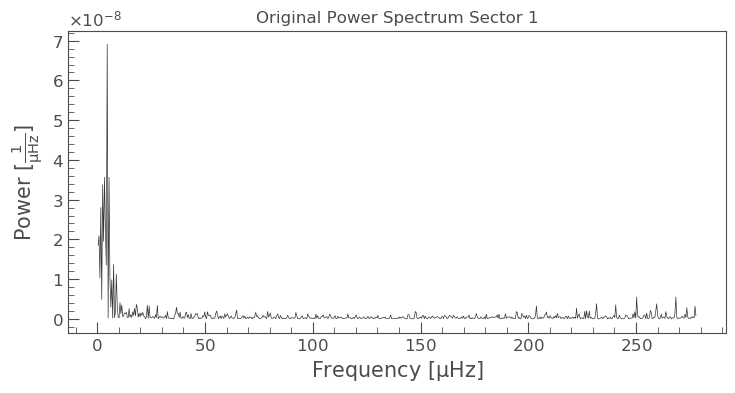

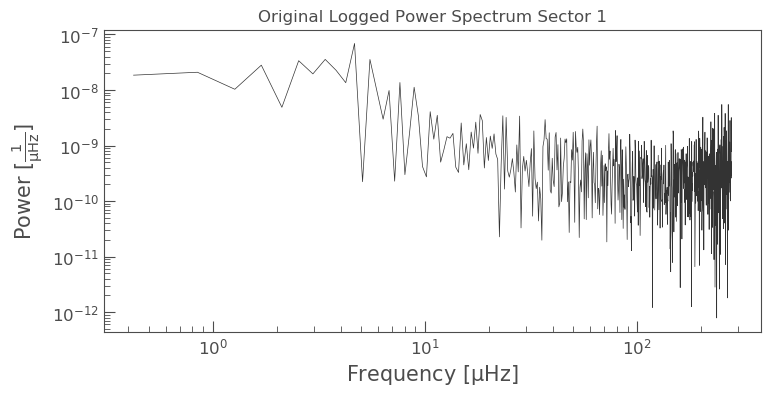

In [21]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux11[condition] = np.nan


model11 = lk.TessLightCurve(time11,flux11).normalize().remove_outliers(sigma_lower=5, sigma_upper =5).remove_nans().flatten(window_length=145)
power11 = model11.to_periodogram(method='lombscargle', normalization="psd")
model11.scatter()
plt.title('Original Lightcurve Sector 1')
power11.plot()
plt.title('Original Power Spectrum Sector 1')
power11.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model12 = lk.TessLightCurve(time12,flux12).normalize().remove_outliers(sigma_lower=5, sigma_upper=5).remove_nans().flatten(window_length=145)
power12 = model12.to_periodogram(method='lombscargle', normalization="psd")
model12.scatter()
plt.title('Original Lightcurve Sector 2')
power12.plot()
plt.title('Original Power Spectrum Sector 1')
power12.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

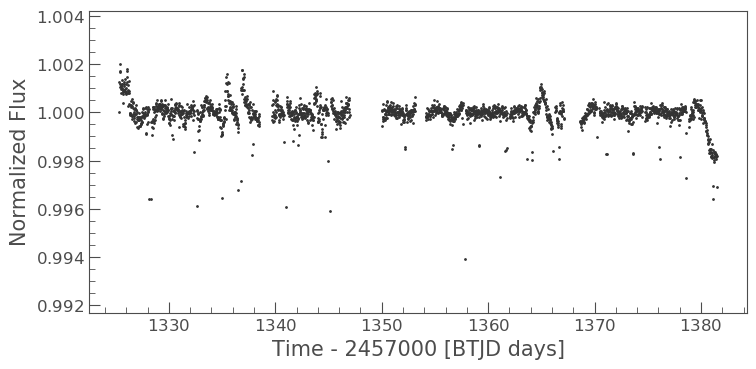

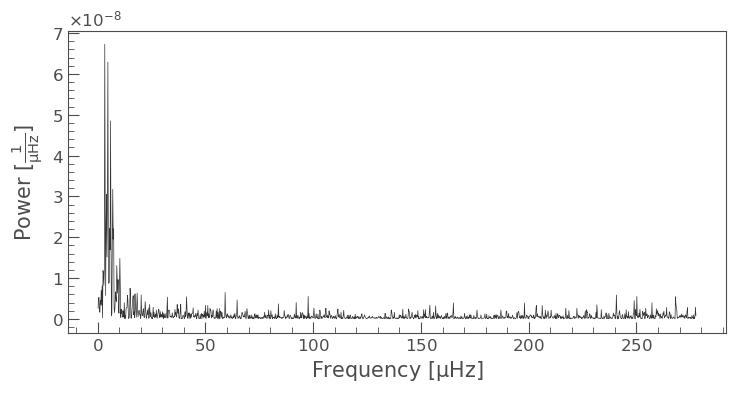

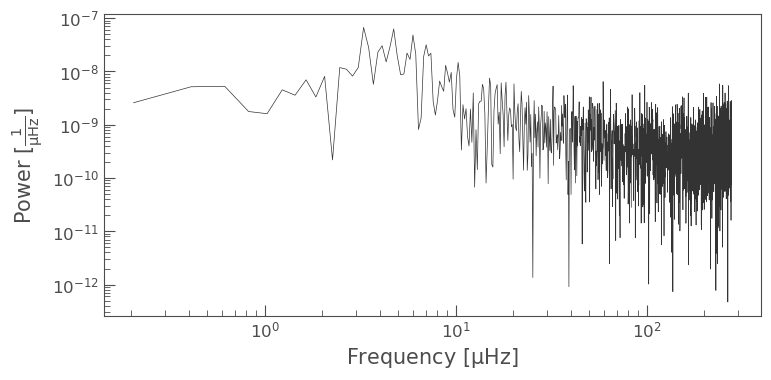

In [22]:
#Now to stitch the two sectors together and do same process..
combined_model6 = model11.append(model12)
combined_model6.scatter()
power_combined6 = combined_model6.to_periodogram(method='lombscargle', normalization="psd")
power_combined6.plot()
power_combined6.plot(scale='log')

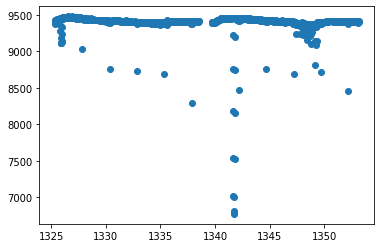

In [23]:
hdul13 = fits.open(cand13)
dataset13 = hdul13[1].data
time13 = dataset13['TIME']
flux13 = dataset13['FLUX_RAW']
sect = hdul13[0].header['SECTOR']
camera = hdul13[0].header['CAMERA']
CCD = hdul13[0].header['CCD']

plt.scatter(time13,flux13)
plt.show()


Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

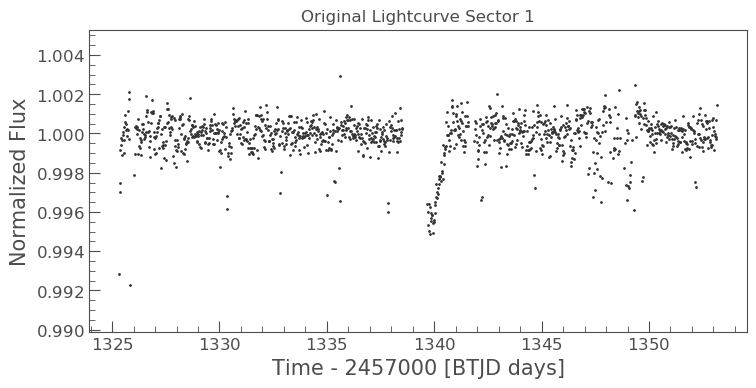

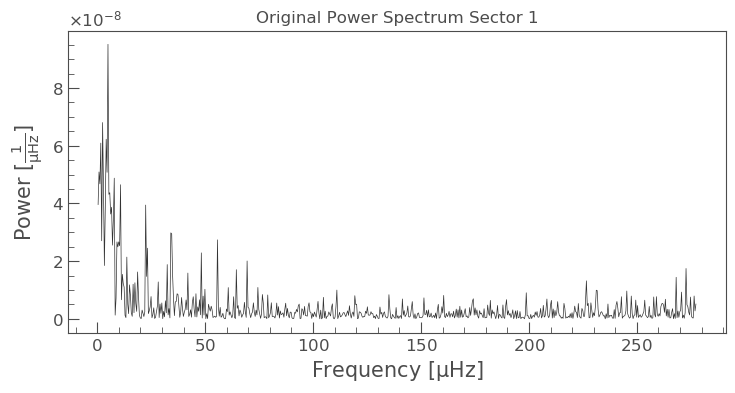

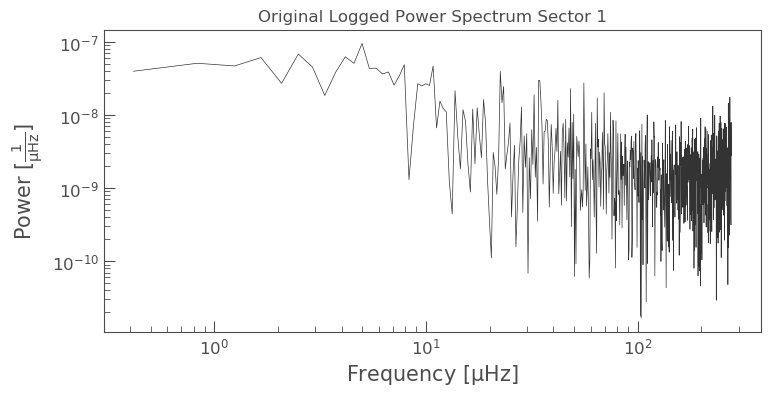

In [24]:
model13 = lk.TessLightCurve(time13,flux13).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power13 = model13.to_periodogram(method='lombscargle', normalization="psd")
model13.scatter()
plt.title('Original Lightcurve Sector 1')
power13.plot()
plt.title('Original Power Spectrum Sector 1')
power13.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

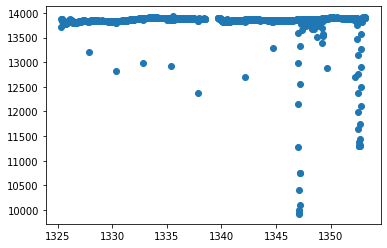

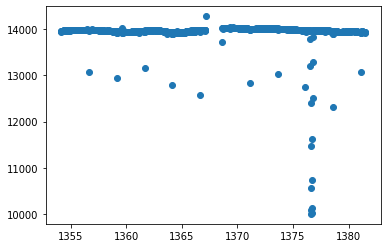

In [25]:
hdul14 = fits.open(cand14)
dataset14 = hdul14[1].data
time14 = dataset14['TIME']
flux14 = dataset14['FLUX_RAW']
sect = hdul14[0].header['SECTOR']
camera = hdul14[0].header['CAMERA']
CCD = hdul14[0].header['CCD']

plt.scatter(time14,flux14)
plt.show()

hdul15 = fits.open(cand15)
dataset15 = hdul15[1].data
time15 = dataset15['TIME']
flux15 = dataset15['FLUX_RAW']
sect = hdul15[0].header['SECTOR']
camera = hdul15[0].header['CAMERA']
CCD = hdul15[0].header['CCD']

plt.scatter(time15,flux15)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

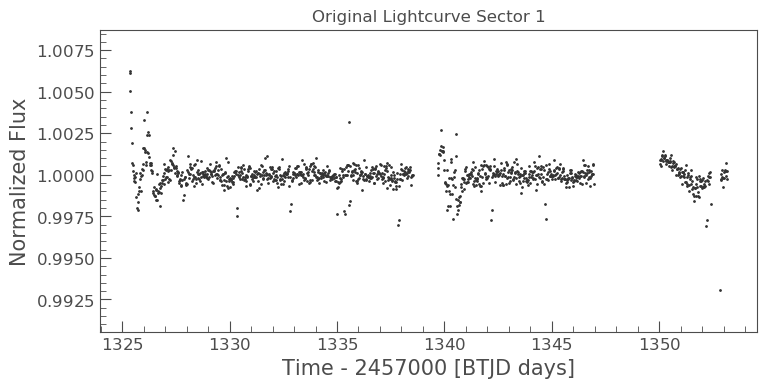

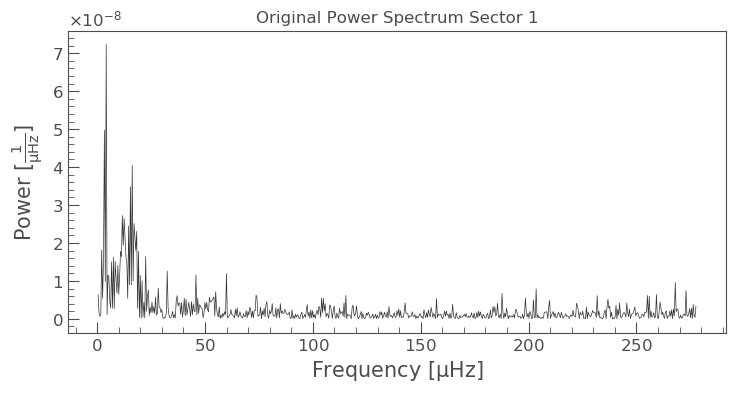

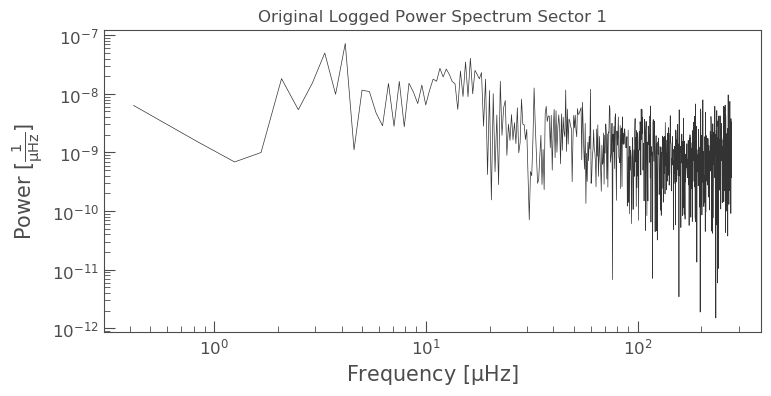

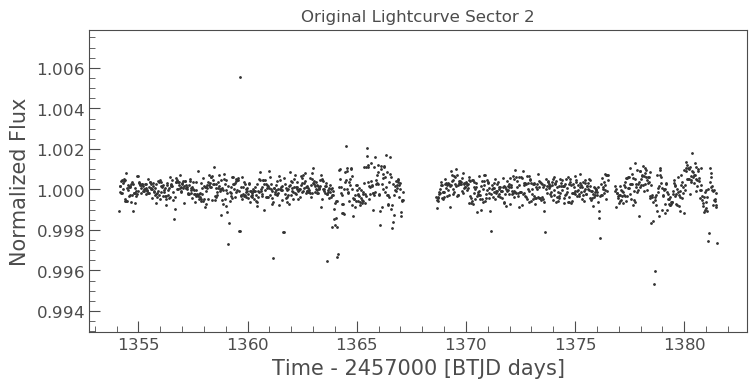

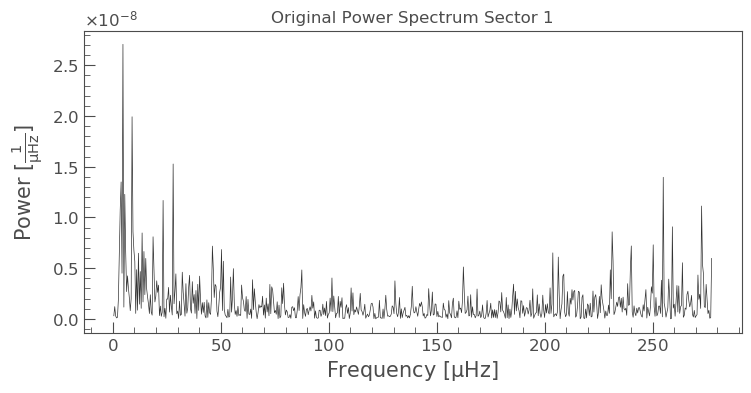

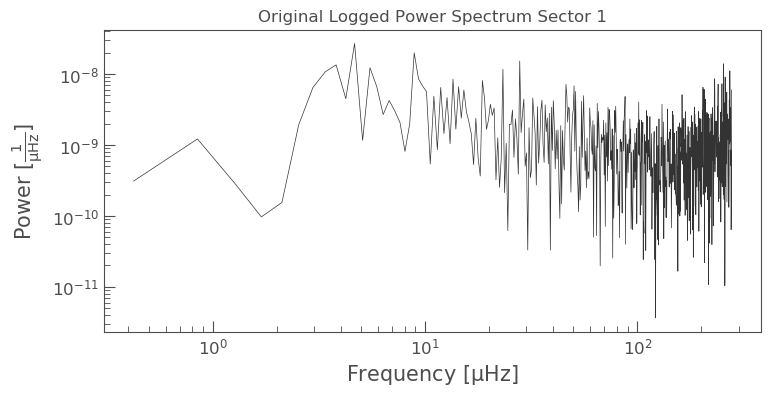

In [26]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux14[condition] = np.nan


model14 = lk.TessLightCurve(time14,flux14).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power14 = model14.to_periodogram(method='lombscargle', normalization="psd")
model14.scatter()
plt.title('Original Lightcurve Sector 1')
power14.plot()
plt.title('Original Power Spectrum Sector 1')
power14.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model15 = lk.TessLightCurve(time15,flux15).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power15 = model15.to_periodogram(method='lombscargle', normalization="psd")
model15.scatter()
plt.title('Original Lightcurve Sector 2')
power15.plot()
plt.title('Original Power Spectrum Sector 1')
power15.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

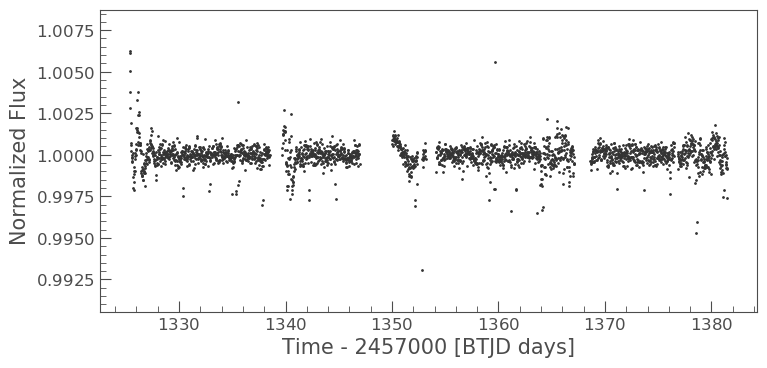

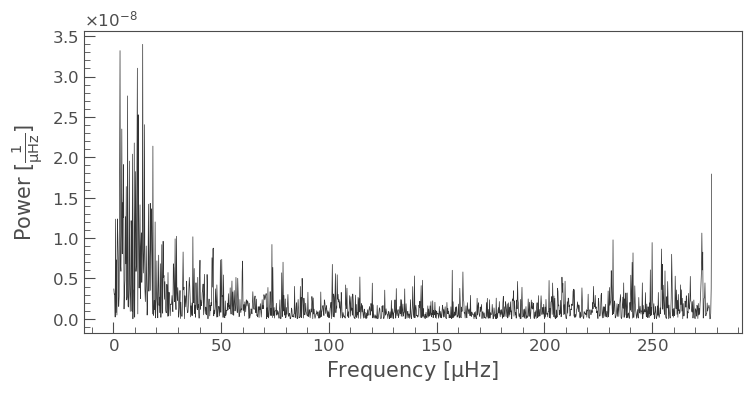

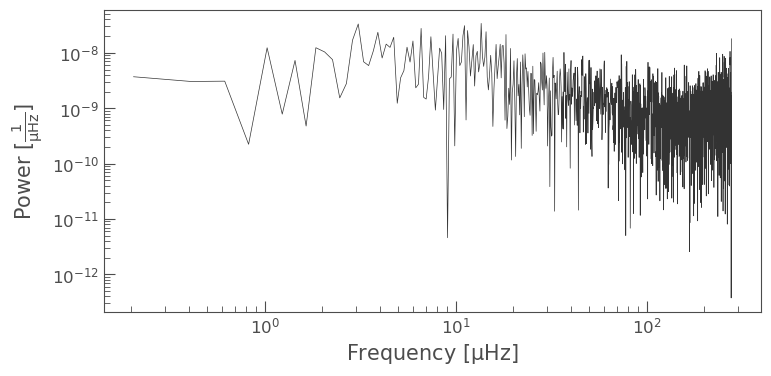

In [27]:
#Now to stitch the two sectors together and do same process..
combined_model7 = model14.append(model15)
combined_model7.scatter()
power_combined7 = combined_model7.to_periodogram(method='lombscargle', normalization="psd")
power_combined7.plot()
power_combined7.plot(scale='log')

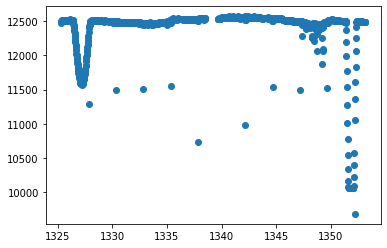

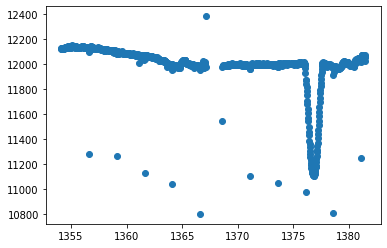

In [28]:
hdul16 = fits.open(cand16)
dataset16 = hdul16[1].data
time16 = dataset16['TIME']
flux16 = dataset16['FLUX_RAW']
sect = hdul16[0].header['SECTOR']
camera = hdul16[0].header['CAMERA']
CCD = hdul16[0].header['CCD']

plt.scatter(time16,flux16)
plt.show()

hdul17 = fits.open(cand17)
dataset17 = hdul17[1].data
time17 = dataset17['TIME']
flux17 = dataset17['FLUX_RAW']
sect = hdul17[0].header['SECTOR']
camera = hdul17[0].header['CAMERA']
CCD = hdul17[0].header['CCD']

plt.scatter(time17,flux17)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

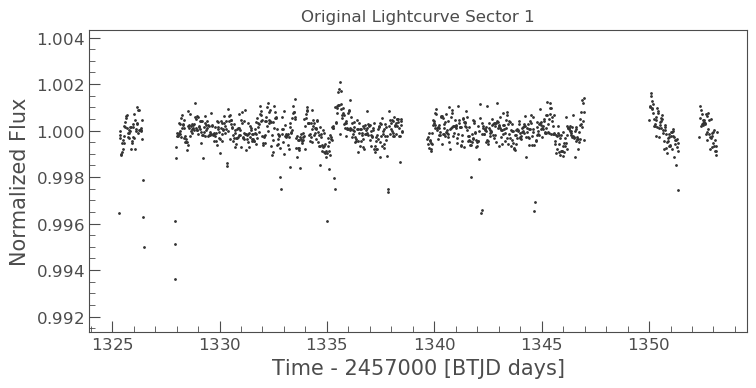

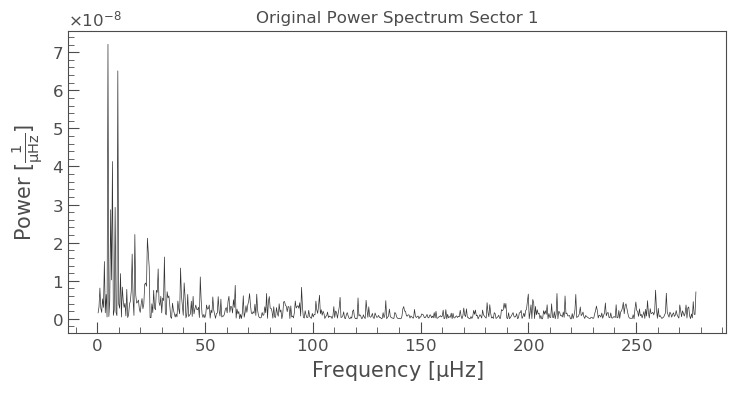

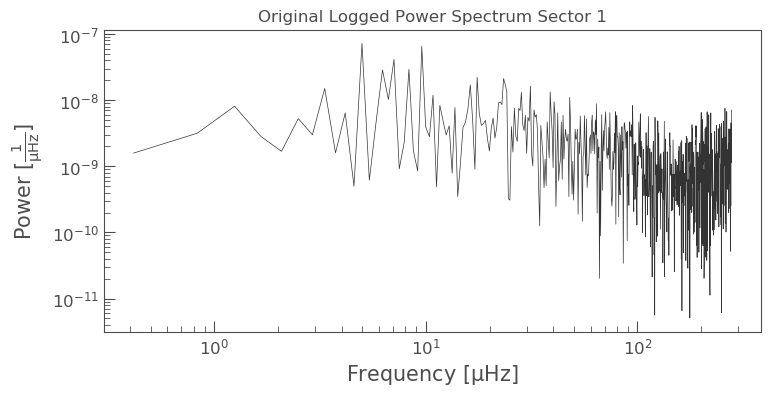

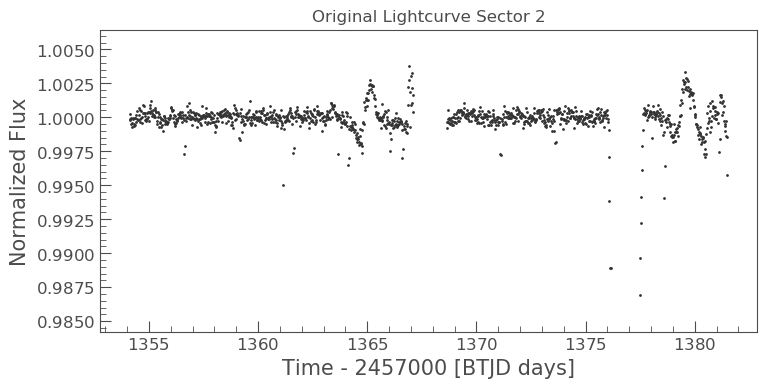

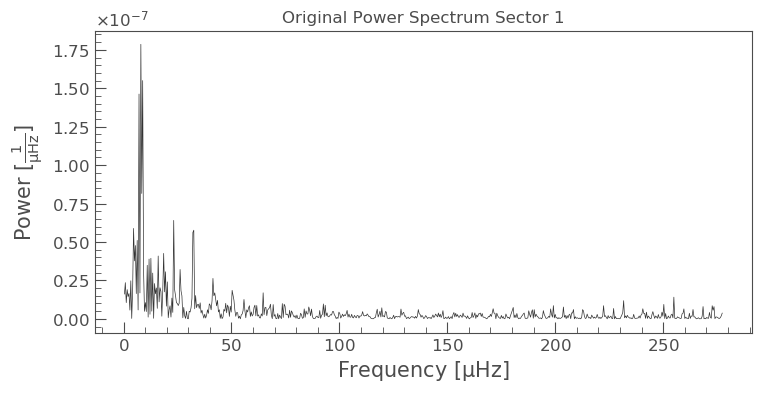

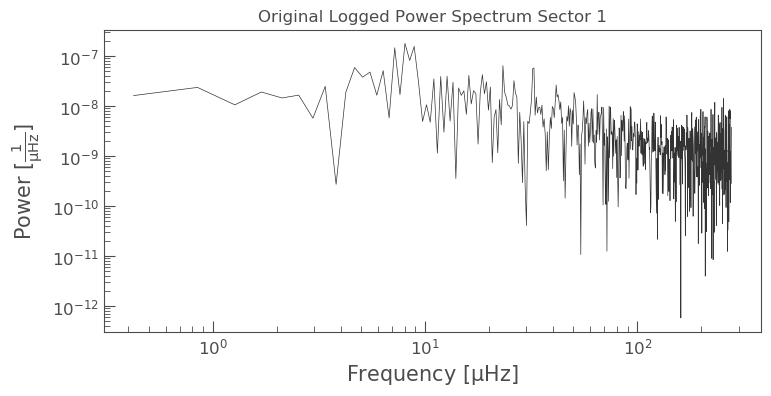

In [30]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux16[condition] = np.nan


model16 = lk.TessLightCurve(time16,flux16).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power16 = model16.to_periodogram(method='lombscargle', normalization="psd")
model16.scatter()
plt.title('Original Lightcurve Sector 1')
power16.plot()
plt.title('Original Power Spectrum Sector 1')
power16.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model17 = lk.TessLightCurve(time17,flux17).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power17 = model17.to_periodogram(method='lombscargle', normalization="psd")
model17.scatter()
plt.title('Original Lightcurve Sector 2')
power17.plot()
plt.title('Original Power Spectrum Sector 1')
power17.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

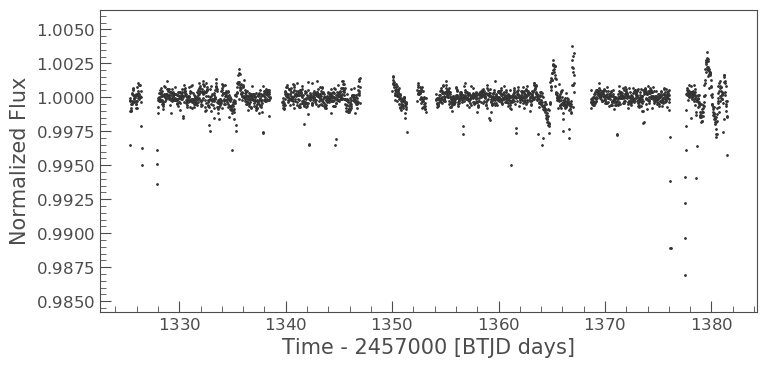

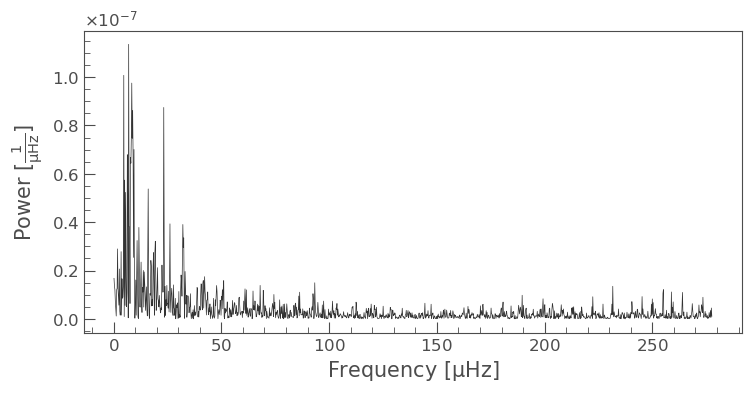

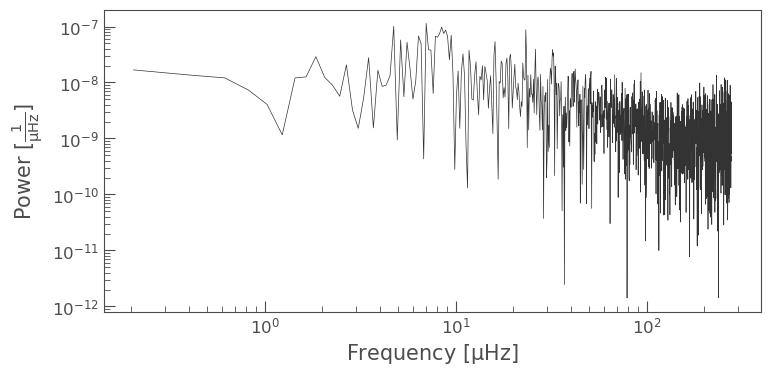

In [31]:
#Now to stitch the two sectors together and do same process..
combined_model8 = model16.append(model17)
combined_model8.scatter()
power_combined8 = combined_model8.to_periodogram(method='lombscargle', normalization="psd")
power_combined8.plot()
power_combined8.plot(scale='log')

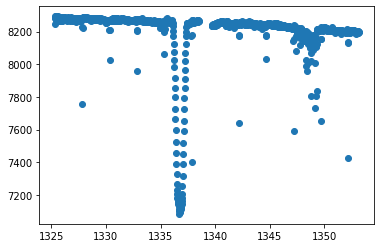

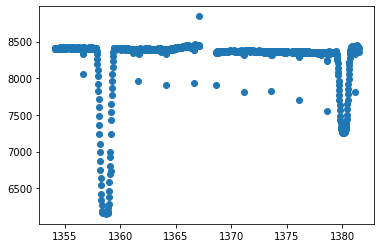

In [32]:
hdul18 = fits.open(cand18)
dataset18 = hdul18[1].data
time18 = dataset18['TIME']
flux18 = dataset18['FLUX_RAW']
sect = hdul18[0].header['SECTOR']
camera = hdul18[0].header['CAMERA']
CCD = hdul18[0].header['CCD']

plt.scatter(time18,flux18)
plt.show()

hdul19 = fits.open(cand19)
dataset19 = hdul19[1].data
time19 = dataset19['TIME']
flux19 = dataset19['FLUX_RAW']
sect = hdul19[0].header['SECTOR']
camera = hdul19[0].header['CAMERA']
CCD = hdul19[0].header['CCD']

plt.scatter(time19,flux19)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

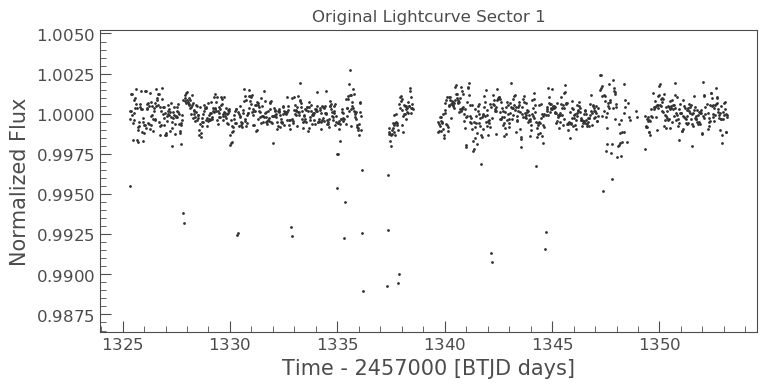

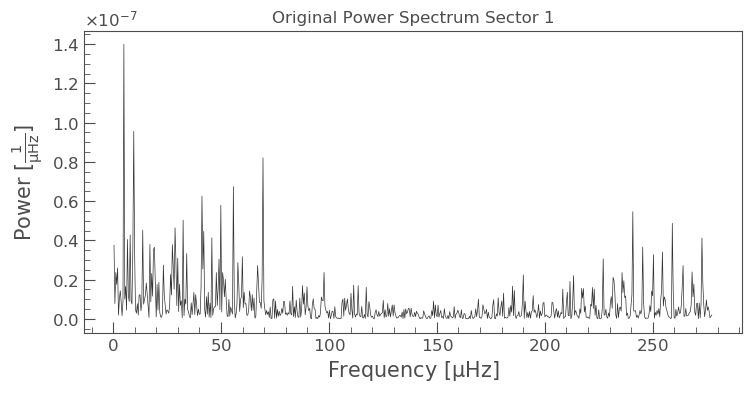

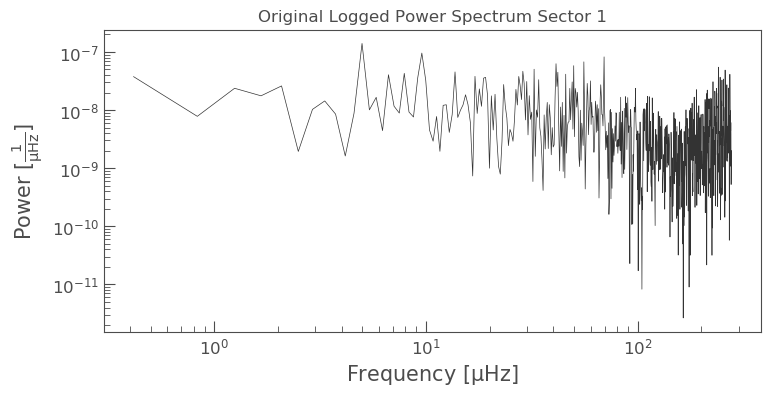

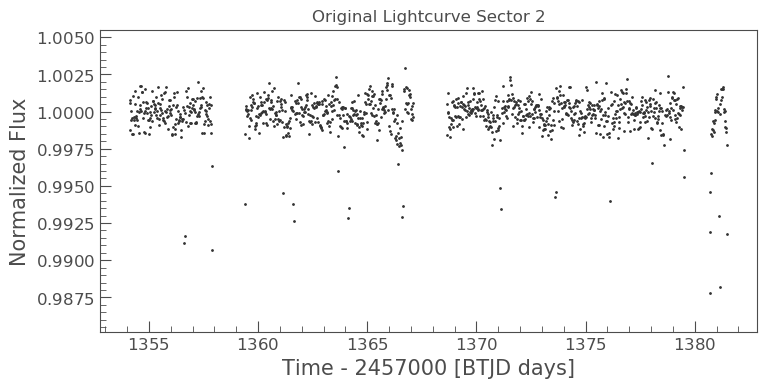

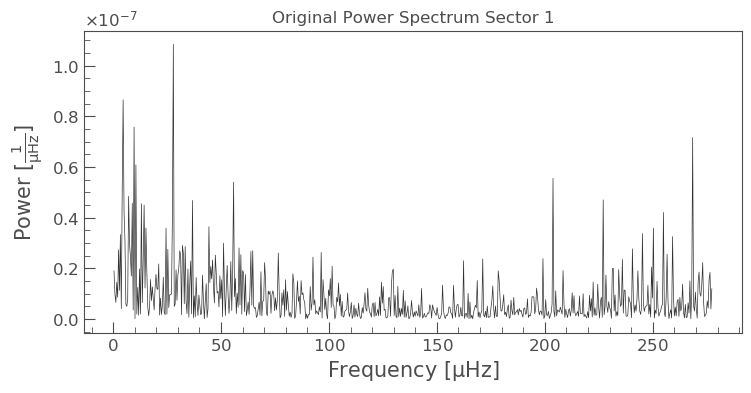

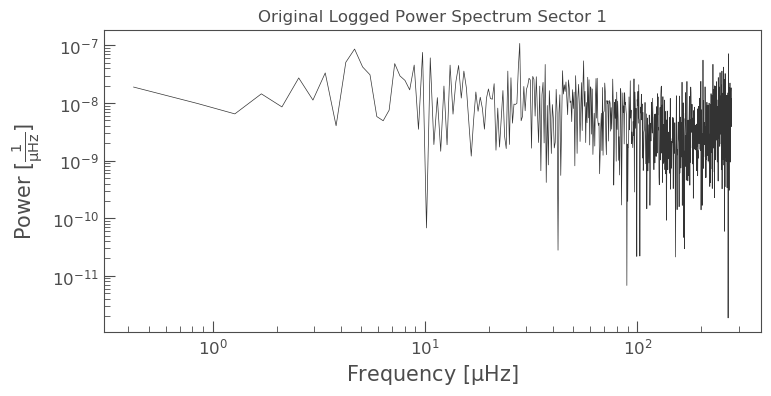

In [42]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux16[condition] = np.nan


model18 = lk.TessLightCurve(time18,flux18).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power18 = model18.to_periodogram(method='lombscargle', normalization="psd")
model18.scatter()
plt.title('Original Lightcurve Sector 1')
power18.plot()
plt.title('Original Power Spectrum Sector 1')
power18.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model19 = lk.TessLightCurve(time19,flux19).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power19 = model19.to_periodogram(method='lombscargle', normalization="psd")
model19.scatter()
plt.title('Original Lightcurve Sector 2')
power19.plot()
plt.title('Original Power Spectrum Sector 1')
power19.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

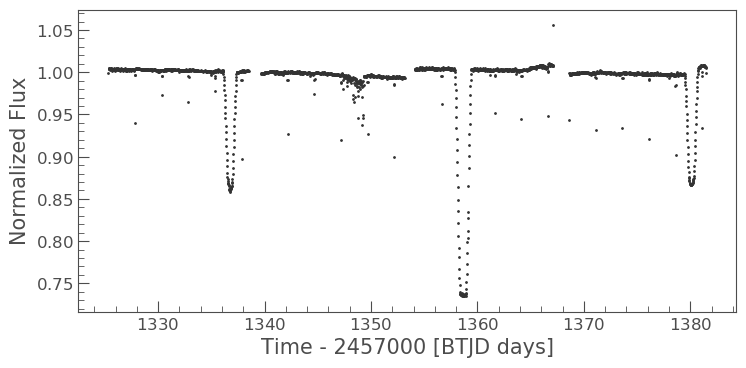

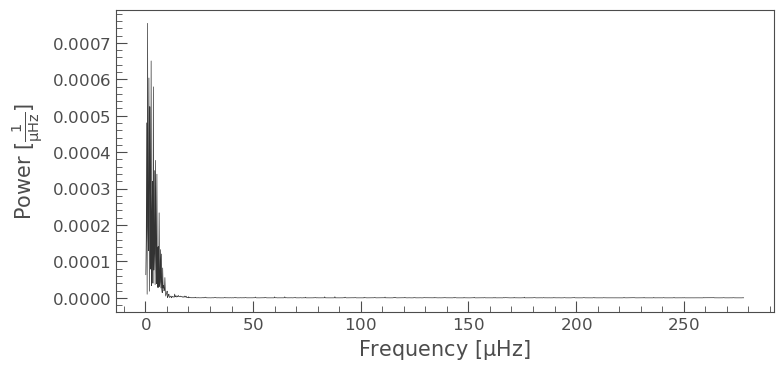

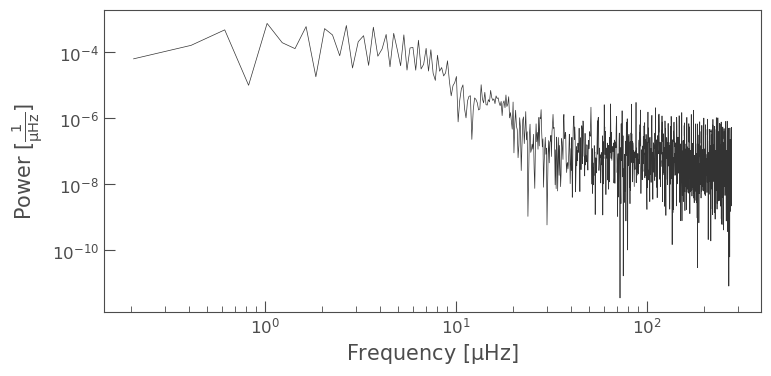

In [34]:
#Now to stitch the two sectors together and do same process..
combined_model9 = model18.append(model19)
combined_model9.scatter()
power_combined9 = combined_model9.to_periodogram(method='lombscargle', normalization="psd")
power_combined9.plot()
power_combined9.plot(scale='log')

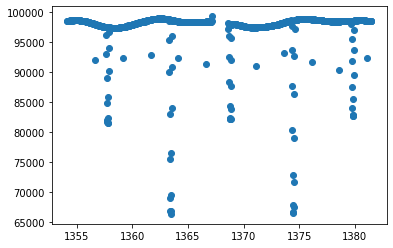

In [35]:
hdul20 = fits.open(cand20)
dataset20 = hdul20[1].data
time20 = dataset20['TIME']
flux20 = dataset20['FLUX_RAW']
sect = hdul20[0].header['SECTOR']
camera = hdul20[0].header['CAMERA']
CCD = hdul20[0].header['CCD']

plt.scatter(time20,flux20)
plt.show()


Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

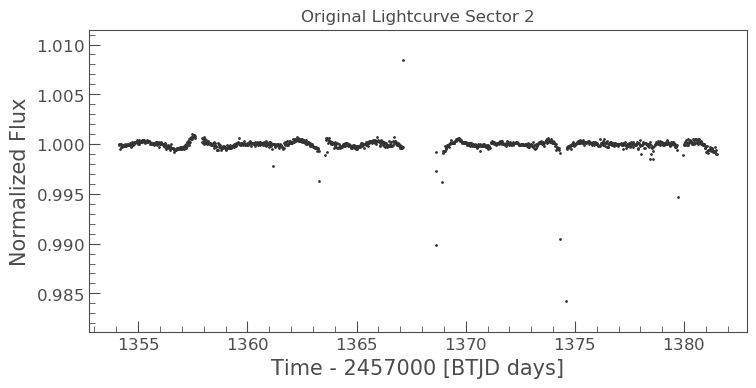

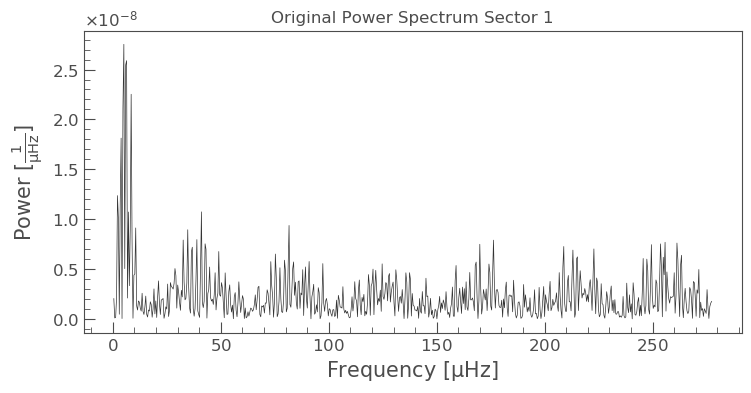

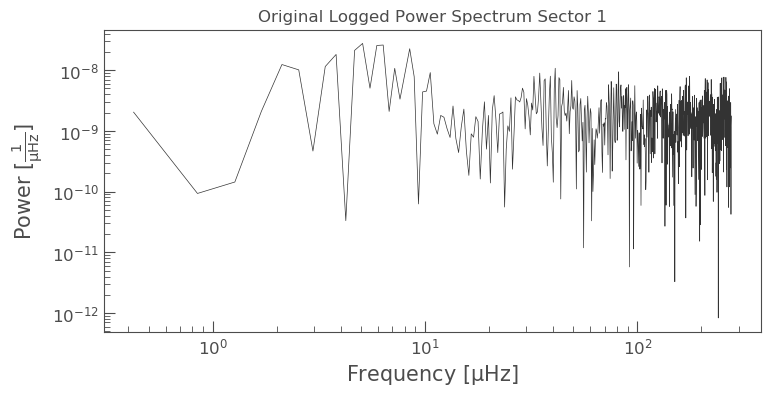

In [43]:
model20 = lk.TessLightCurve(time20,flux20).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power20 = model20.to_periodogram(method='lombscargle', normalization="psd")
model20.scatter()
plt.title('Original Lightcurve Sector 2')
power20.plot()
plt.title('Original Power Spectrum Sector 1')
power20.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

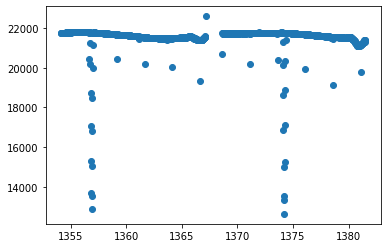

In [37]:
hdul21 = fits.open(cand21)
dataset21 = hdul21[1].data
time21 = dataset21['TIME']
flux21 = dataset21['FLUX_RAW']
sect = hdul21[0].header['SECTOR']
camera = hdul21[0].header['CAMERA']
CCD = hdul21[0].header['CCD']

plt.scatter(time21,flux21)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

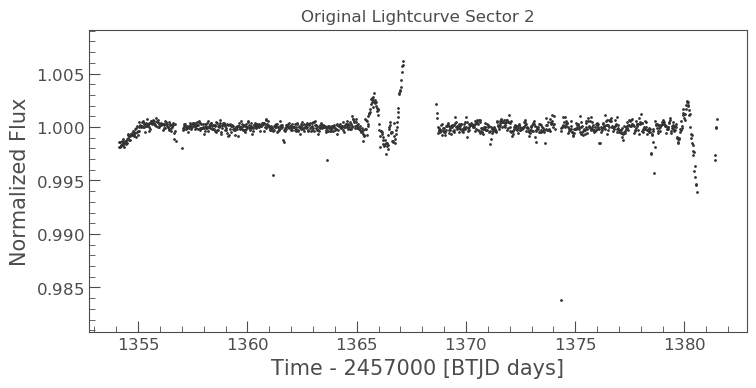

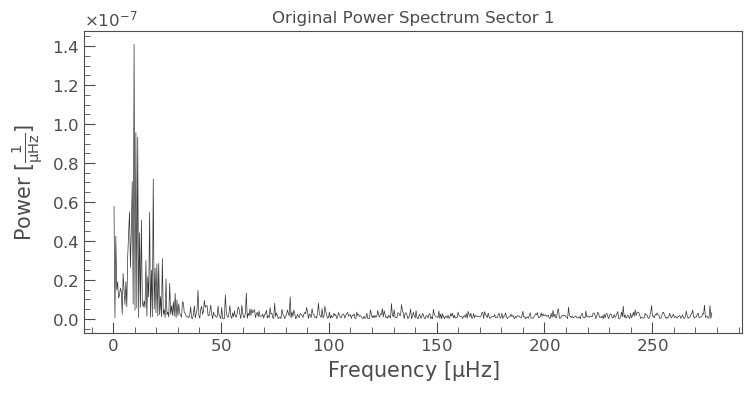

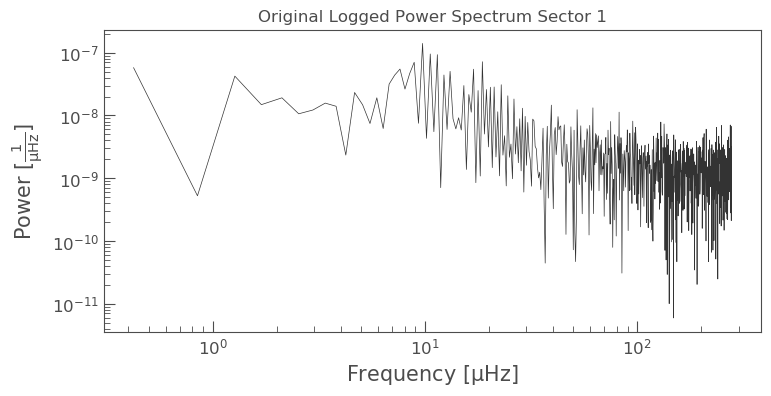

In [44]:
model21 = lk.TessLightCurve(time21,flux21).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power21 = model21.to_periodogram(method='lombscargle', normalization="psd")
model21.scatter()
plt.title('Original Lightcurve Sector 2')
power21.plot()
plt.title('Original Power Spectrum Sector 1')
power21.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

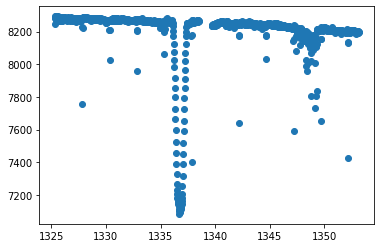

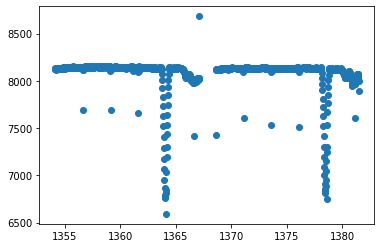

In [39]:
hdul22 = fits.open(cand22)
dataset22 = hdul22[1].data
time22 = dataset22['TIME']
flux22 = dataset22['FLUX_RAW']
sect = hdul22[0].header['SECTOR']
camera = hdul22[0].header['CAMERA']
CCD = hdul22[0].header['CCD']

plt.scatter(time18,flux18)
plt.show()

hdul23 = fits.open(cand23)
dataset23 = hdul23[1].data
time23 = dataset23['TIME']
flux23 = dataset23['FLUX_RAW']
sect = hdul23[0].header['SECTOR']
camera = hdul23[0].header['CAMERA']
CCD = hdul23[0].header['CCD']

plt.scatter(time23,flux23)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

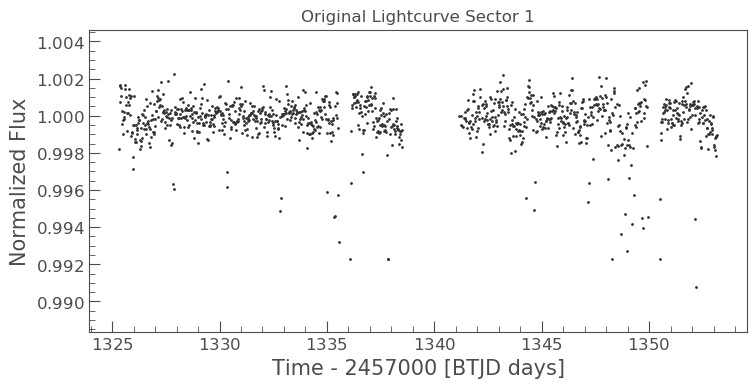

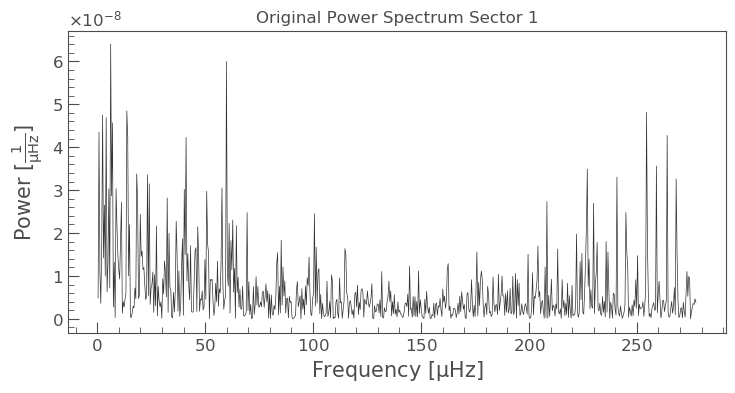

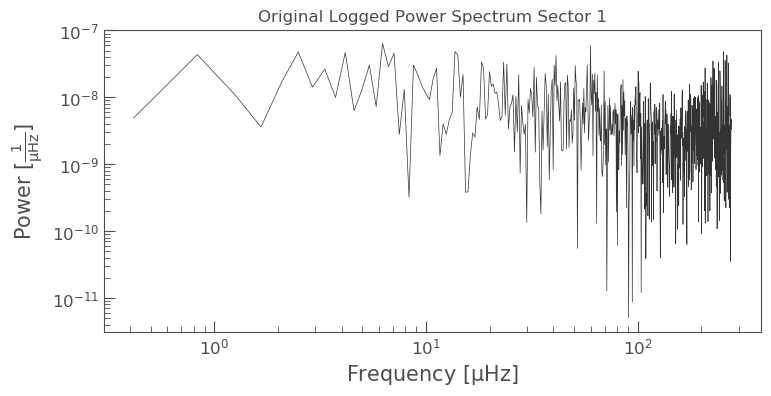

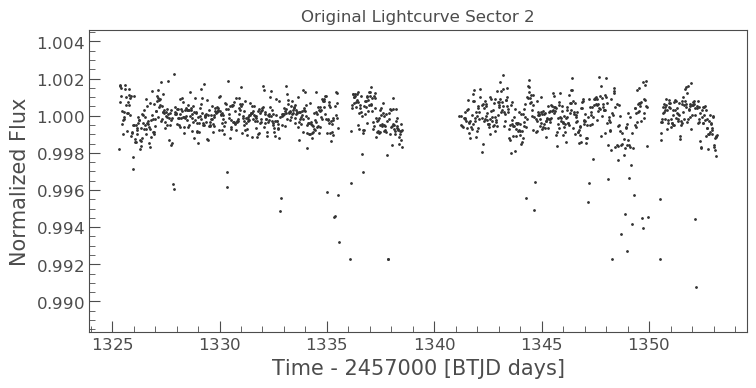

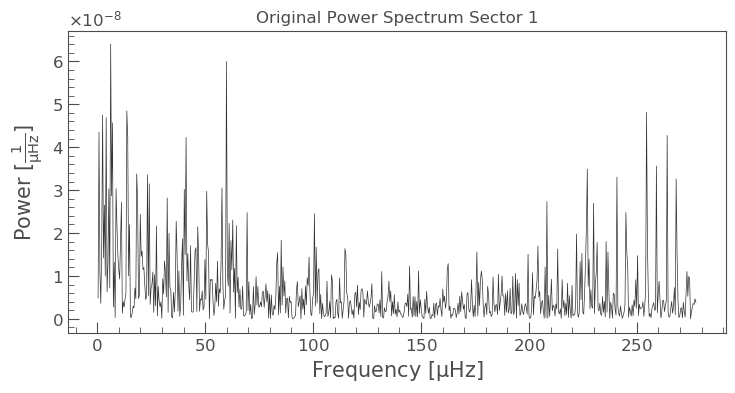

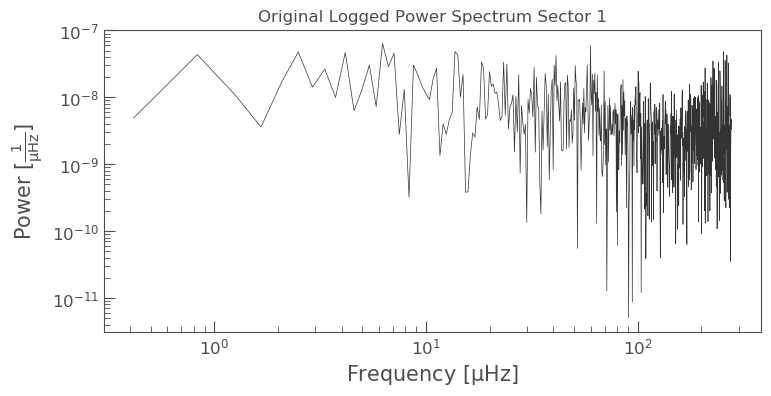

In [45]:
#Clip the large systematic
condition = ((time3 > 1347) & (time3 < 1350))
flux16[condition] = np.nan


model22 = lk.TessLightCurve(time22,flux22).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power22 = model22.to_periodogram(method='lombscargle', normalization="psd")
model22.scatter()
plt.title('Original Lightcurve Sector 1')
power22.plot()
plt.title('Original Power Spectrum Sector 1')
power22.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model23 = lk.TessLightCurve(time22,flux22).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power23 = model23.to_periodogram(method='lombscargle', normalization="psd")
model23.scatter()
plt.title('Original Lightcurve Sector 2')
power23.plot()
plt.title('Original Power Spectrum Sector 1')
power23.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

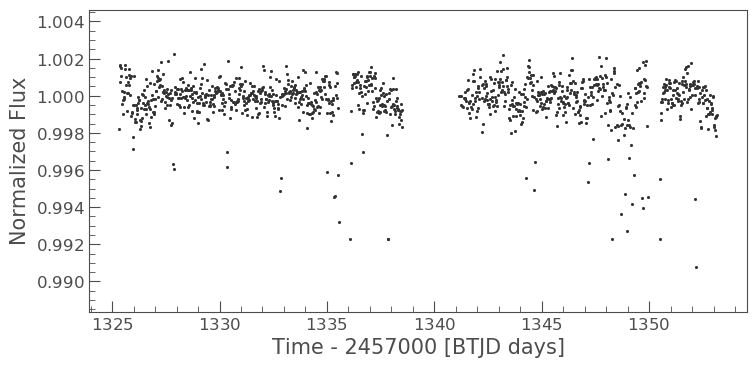

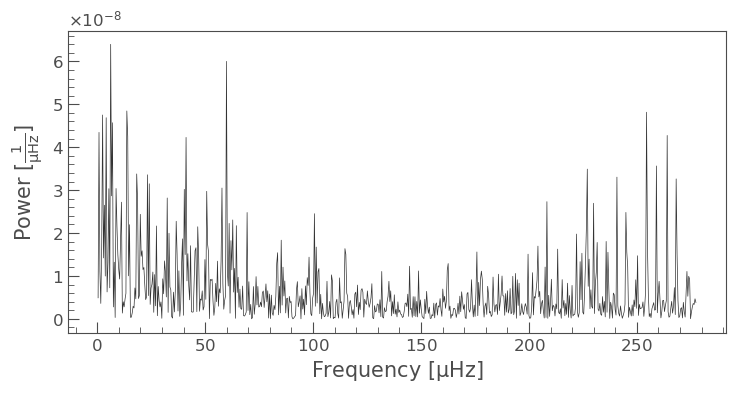

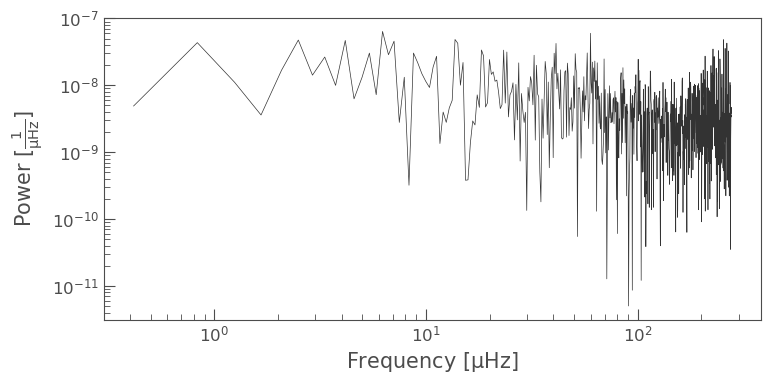

In [47]:
#Now to stitch the two sectors together and do same process..
combined_model10 = model22.append(model23)
combined_model10.scatter()
power_combined10 = combined_model10.to_periodogram(method='lombscargle', normalization="psd")
power_combined10.plot()
power_combined10.plot(scale='log')